In [1]:
from  calculate_simmilarity_resnet import ResnetSimmilarity

from PIL import Image
from progressbar import ProgressBar

from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections
from nearpy.distances import CosineDistance

import sys


import pickle
import os
from nearpy.storage import MemoryStorage

from IPython.display import  display
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# pic_one = Image.open("./data/flower_data/train/1/image_06734.jpg")
# pic_one1 = Image.open("./data/flower_data/train/1/image_06734.jpg")
# pic_two = Image.open("./data/flower_data/train/21/image_06774.jpg")
# pic_three = Image.open("./data/download.jpeg")

### Form ResnetSimmilarity we can get embedding of a vector 

- get image embedding
        - ResnetSimmilarity() returns the image embedding by passing it through resnet Model 
- initialize LSH and add each image embedding 
- save hash table in pkl file

In [3]:
res = ResnetSimmilarity()
pbar = ProgressBar()

In [4]:
# Dimension of our vector space
dimension = 2048

# Create a random binary hash with 10 bits
rbp = RandomBinaryProjections('rbp', 10)


msote = MemoryStorage()

engine = Engine(dimension, lshashes=[rbp],storage=msote,distance=CosineDistance())

In [5]:
%%time
## Adding the Images to the Hash Table
rootdir = 'data/classed_data/train/'

count = 0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if '.jpg' in file:
            img_path = os.path.join(subdir, file)
            img = Image.open(img_path)
            
            if img.size[0] >=100:
                img_emb = res.getMapping(img)
                img_emb = img_emb.view(-1,2048)
                img_emb = img_emb.numpy()


                engine.store_vector(img_emb[0],img_path)
                if count%1000 == 0:
                    print("Saving  Image Embedding ",count)

                count += 1
print(count)

('Saving  Image Embedding ', 0)
('Saving  Image Embedding ', 1000)
('Saving  Image Embedding ', 2000)
('Saving  Image Embedding ', 3000)
('Saving  Image Embedding ', 4000)
('Saving  Image Embedding ', 5000)
('Saving  Image Embedding ', 6000)
('Saving  Image Embedding ', 7000)
('Saving  Image Embedding ', 8000)
('Saving  Image Embedding ', 9000)
('Saving  Image Embedding ', 10000)
('Saving  Image Embedding ', 11000)
('Saving  Image Embedding ', 12000)
('Saving  Image Embedding ', 13000)
('Saving  Image Embedding ', 14000)
('Saving  Image Embedding ', 15000)
('Saving  Image Embedding ', 16000)
('Saving  Image Embedding ', 17000)
('Saving  Image Embedding ', 18000)
('Saving  Image Embedding ', 19000)
('Saving  Image Embedding ', 20000)
('Saving  Image Embedding ', 21000)
('Saving  Image Embedding ', 22000)
('Saving  Image Embedding ', 23000)
('Saving  Image Embedding ', 24000)
('Saving  Image Embedding ', 25000)
('Saving  Image Embedding ', 26000)
('Saving  Image Embedding ', 27000)
('Sav

In [6]:
%%time
filehandler = open("hashed_object.pkl", 'w')
pickle.dump(engine, filehandler)


CPU times: user 1min 26s, sys: 1.79 s, total: 1min 28s
Wall time: 1min 30s


### Restore Hased Table 

- read stored hash table 
- perform a search query 

In [7]:
%%time
filehandler = open("hashed_object.pkl", 'r')
en_loaded = pickle.load(filehandler)

CPU times: user 21.4 s, sys: 1.13 s, total: 22.5 s
Wall time: 22.5 s


(1, 2048)


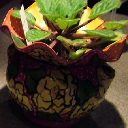

In [8]:

pic_one1 = Image.open("./data/classed_data/val/Flowerpot/d5c269edcbabbab6.jpg")

# image to test query
pic_one1_emb = res.getMapping(pic_one1)
pic_one1_emb = pic_one1_emb.view(-1,2048)
pic_one1_emb = pic_one1_emb.numpy()

print(pic_one1_emb.shape)


query = pic_one1_emb[0]

display(pic_one1.resize((128,128)))

#### Query on one image and get simmilarity result

(0.00353, 'data/classed_data/train/Fast food/489f1c02b8601b0a.jpg')


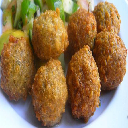

(0.00355, 'data/classed_data/train/Clothing/49659aaa200d12aa.jpg')


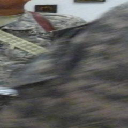

(0.00359, 'data/classed_data/train/Window/cec633e80c68b587.jpg')


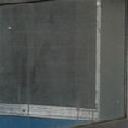

(0.00361, 'data/classed_data/train/Vegetable/3d531172d49e9857.jpg')


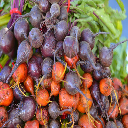

(0.00362, 'data/classed_data/train/Plant/3a9b1cf5c9828557.jpg')


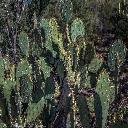

(0.00364, 'data/classed_data/train/Plant/65a11ed36e90a127.jpg')


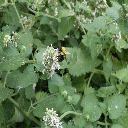

(0.00365, 'data/classed_data/train/Person/c542c23a5c04ff90.jpg')


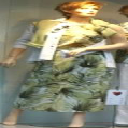

(0.00365, 'data/classed_data/train/Pen/8d2c4cbf76a9ed4f.jpg')


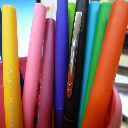

(0.00366, 'data/classed_data/train/Shrimp/930b81976c382cda.jpg')


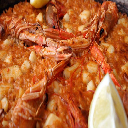

(0.00367, 'data/classed_data/train/Grapefruit/f9705847c26e33b3.jpg')


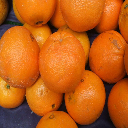

CPU times: user 636 ms, sys: 124 ms, total: 760 ms
Wall time: 862 ms


In [9]:
%%time

N = en_loaded.neighbours(query)
for i in range(len(N)):
    print(round(float(N[i][2]),5),N[i][1])
    img = Image.open(N[i][1])
    img = img.resize((128,128))
    display(img)
    if i == 10:
        break
    

### Evaluation For The whole val folder


In [10]:
%%time
import csv
## Adding the Images to the Hash Table
rootdir = 'data/classed_data/val/'

count = 0

with open("data/output.csv",'wb') as resultFile:
    wr = csv.writer(resultFile, quoting=csv.QUOTE_ALL)
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if '.jpg' in file:
                output = []
                img_path = os.path.join(subdir, file)
                img = Image.open(img_path)

                img_emb = res.getMapping(img)
                img_emb = img_emb.view(-1,2048)
                img_emb = img_emb.numpy()
                query = img_emb[0]
                N = en_loaded.neighbours(query)

                output_item = [N[i][1] for i in range(len(N))]
                output.append(img_path)
                for i in output_item:
                    output.append(i)
                wr.writerows([output])
#                 print(output)


CPU times: user 54min 40s, sys: 18min 11s, total: 1h 12min 51s
Wall time: 46min 42s


In [11]:
def save_img(files,image_name):
    result = Image.new("RGB", (1600, 800))

    for index, file in enumerate(files):
      path = os.path.expanduser(file)
      img = Image.open(path)
      img = img.resize((390,390))
      img.thumbnail((400, 400), Image.ANTIALIAS)
      x = index // 2 * 400
      y = index % 2 * 400
      w, h = img.size
      result.paste(img, (x, y, x + w, y + h))

    print('saving',files[0],image_name)
    result.save(image_name)

In [12]:
import csv
import random

with open('data/output.csv') as csvfile:
    data_class = list(csv.reader(csvfile))

    
random.shuffle(data_class)

In [14]:
for i in range(len(data_class)):
    img = Image.open(data_class[i][:-4][0])
    if img.size[0] >= 100:
        save_img(data_class[i][:-4],"data/sample_out/"+str(i)+".jpg")



('saving', 'data/classed_data/val/Person/47cc2554b24c05e2.jpg', 'data/sample_out/1.jpg')
('saving', 'data/classed_data/val/Car/1418a3a04bc7cc9b.jpg', 'data/sample_out/2.jpg')
('saving', 'data/classed_data/val/Car/23903ae91d1369a9.jpg', 'data/sample_out/5.jpg')
('saving', 'data/classed_data/val/Land vehicle/2230b13c834b4db6.jpg', 'data/sample_out/7.jpg')
('saving', 'data/classed_data/val/Bottle/676b3350d3fb8061.jpg', 'data/sample_out/9.jpg')
('saving', 'data/classed_data/val/Human eye/00eb69293aa4c5b7.jpg', 'data/sample_out/10.jpg')
('saving', 'data/classed_data/val/Person/3175067fea28884e.jpg', 'data/sample_out/11.jpg')
('saving', 'data/classed_data/val/Plant/cbf4c6f0daedc407.jpg', 'data/sample_out/14.jpg')
('saving', 'data/classed_data/val/Human face/085005e11ebacccf.jpg', 'data/sample_out/16.jpg')
('saving', 'data/classed_data/val/Baked goods/a786939cd9a477a2.jpg', 'data/sample_out/17.jpg')
('saving', 'data/classed_data/val/Mammal/d37fcfc940030cd6.jpg', 'data/sample_out/18.jpg')
('sa

('saving', 'data/classed_data/val/Clothing/546d7c57b84bdb19.jpg', 'data/sample_out/116.jpg')
('saving', 'data/classed_data/val/Car/a5f7c0cb8d4c7759.jpg', 'data/sample_out/117.jpg')
('saving', 'data/classed_data/val/Building/a5d28dfec6c50f89.jpg', 'data/sample_out/119.jpg')
('saving', 'data/classed_data/val/Crown/e68d91cbc60ad21e.jpg', 'data/sample_out/120.jpg')
('saving', 'data/classed_data/val/Dog/b1bfdbdf9dce22c7.jpg', 'data/sample_out/122.jpg')
('saving', 'data/classed_data/val/Clothing/34d3dbb5e8b11e49.jpg', 'data/sample_out/123.jpg')
('saving', 'data/classed_data/val/Human body/5546478c4bce290e.jpg', 'data/sample_out/124.jpg')
('saving', 'data/classed_data/val/Flowerpot/65c710abcc744696.jpg', 'data/sample_out/125.jpg')
('saving', 'data/classed_data/val/Clothing/ffa20d71c635caa5.jpg', 'data/sample_out/126.jpg')
('saving', 'data/classed_data/val/Human face/124892350f674127.jpg', 'data/sample_out/127.jpg')
('saving', 'data/classed_data/val/Cat/0d46532b8ab95063.jpg', 'data/sample_out/

('saving', 'data/classed_data/val/Cake/e90c4ad9905df68d.jpg', 'data/sample_out/229.jpg')
('saving', 'data/classed_data/val/Girl/82560833eab971a5.jpg', 'data/sample_out/230.jpg')
('saving', 'data/classed_data/val/Human body/fedae1e949f6f365.jpg', 'data/sample_out/231.jpg')
('saving', 'data/classed_data/val/Woman/406ad630bcc21406.jpg', 'data/sample_out/232.jpg')
('saving', 'data/classed_data/val/Human body/b6c0f421e773c1d1.jpg', 'data/sample_out/233.jpg')
('saving', 'data/classed_data/val/Wheel/b9afb68a9e578047.jpg', 'data/sample_out/235.jpg')
('saving', 'data/classed_data/val/Waffle/5c07c6eafa313603.jpg', 'data/sample_out/236.jpg')
('saving', 'data/classed_data/val/Food/8ad20899f493a8c0.jpg', 'data/sample_out/237.jpg')
('saving', 'data/classed_data/val/Flower/c685a2cf30d1054e.jpg', 'data/sample_out/238.jpg')
('saving', 'data/classed_data/val/Mammal/1ad2e4465d835f11.jpg', 'data/sample_out/239.jpg')
('saving', 'data/classed_data/val/Car/66ff5aadbcad6081.jpg', 'data/sample_out/240.jpg')
('

('saving', 'data/classed_data/val/Dress/257d66691df7928b.jpg', 'data/sample_out/338.jpg')
('saving', 'data/classed_data/val/Table/140d247f79fc0516.jpg', 'data/sample_out/339.jpg')
('saving', 'data/classed_data/val/Human hair/0fa6d82962ece7ed.jpg', 'data/sample_out/340.jpg')
('saving', 'data/classed_data/val/Human mouth/51455d2a76eb8788.jpg', 'data/sample_out/341.jpg')
('saving', 'data/classed_data/val/Deer/5439d82bed246a94.jpg', 'data/sample_out/342.jpg')
('saving', 'data/classed_data/val/Cabinetry/68e36c64bbd592f9.jpg', 'data/sample_out/343.jpg')
('saving', 'data/classed_data/val/Human nose/c797b29af6a19847.jpg', 'data/sample_out/344.jpg')
('saving', 'data/classed_data/val/Person/387d4b80bc3fdab8.jpg', 'data/sample_out/346.jpg')
('saving', 'data/classed_data/val/Car/0e360a4689ac06e8.jpg', 'data/sample_out/347.jpg')
('saving', 'data/classed_data/val/Human arm/e563db6ac8ec73bc.jpg', 'data/sample_out/349.jpg')
('saving', 'data/classed_data/val/Camera/8b2447b18b699a81.jpg', 'data/sample_o

('saving', 'data/classed_data/val/Dinosaur/590cd0f301b19a13.jpg', 'data/sample_out/447.jpg')
('saving', 'data/classed_data/val/Vehicle/ca86115dc64125b9.jpg', 'data/sample_out/448.jpg')
('saving', 'data/classed_data/val/Mammal/ba99c76e75dcafc4.jpg', 'data/sample_out/450.jpg')
('saving', 'data/classed_data/val/Car/08207a0ccb14a6e5.jpg', 'data/sample_out/451.jpg')
('saving', 'data/classed_data/val/Clothing/d42d89a05bd27236.jpg', 'data/sample_out/452.jpg')
('saving', 'data/classed_data/val/Bookcase/731173d27e06b210.jpg', 'data/sample_out/453.jpg')
('saving', 'data/classed_data/val/Baked goods/13b374d333a1991c.jpg', 'data/sample_out/454.jpg')
('saving', 'data/classed_data/val/Clothing/c71f94549bcfc04e.jpg', 'data/sample_out/455.jpg')
('saving', 'data/classed_data/val/Car/8545bd276f287ca7.jpg', 'data/sample_out/457.jpg')
('saving', 'data/classed_data/val/Plant/630532e4e2e890ba.jpg', 'data/sample_out/458.jpg')
('saving', 'data/classed_data/val/Tank/aed5942e3e17dbf8.jpg', 'data/sample_out/459.

('saving', 'data/classed_data/val/Cake/f0b4d5cf85df0e7b.jpg', 'data/sample_out/566.jpg')
('saving', 'data/classed_data/val/Rifle/410747e8c33e5562.jpg', 'data/sample_out/567.jpg')
('saving', 'data/classed_data/val/Tableware/8ae2a64b957c4f36.jpg', 'data/sample_out/568.jpg')
('saving', 'data/classed_data/val/Car/3175e3a157b311e7.jpg', 'data/sample_out/569.jpg')
('saving', 'data/classed_data/val/Flower/0c97a2a61416d828.jpg', 'data/sample_out/570.jpg')
('saving', 'data/classed_data/val/Goat/5013a8a33f521259.jpg', 'data/sample_out/571.jpg')
('saving', 'data/classed_data/val/Football helmet/5d8c99f560208989.jpg', 'data/sample_out/572.jpg')
('saving', 'data/classed_data/val/Human body/1f7588d27ea9a464.jpg', 'data/sample_out/573.jpg')
('saving', 'data/classed_data/val/Bear/602c892018f75ff1.jpg', 'data/sample_out/574.jpg')
('saving', 'data/classed_data/val/Clothing/2008c9de01d39a22.jpg', 'data/sample_out/575.jpg')
('saving', 'data/classed_data/val/Human body/f767d0f809acae58.jpg', 'data/sample_o

('saving', 'data/classed_data/val/Human head/b3b3b0fda4faaeaf.jpg', 'data/sample_out/689.jpg')
('saving', 'data/classed_data/val/Human leg/7a3f01aa39bba58c.jpg', 'data/sample_out/690.jpg')
('saving', 'data/classed_data/val/Bull/7359d13f1035d53d.jpg', 'data/sample_out/691.jpg')
('saving', 'data/classed_data/val/Food/d7ca3d98fbf3cda7.jpg', 'data/sample_out/692.jpg')
('saving', 'data/classed_data/val/Car/ae8698f97edfb64c.jpg', 'data/sample_out/695.jpg')
('saving', 'data/classed_data/val/Horse/d6db7584e8734c0d.jpg', 'data/sample_out/696.jpg')
('saving', 'data/classed_data/val/Car/95bd43b9c5ab0891.jpg', 'data/sample_out/697.jpg')
('saving', 'data/classed_data/val/Car/b3666f3c727a0299.jpg', 'data/sample_out/698.jpg')
('saving', 'data/classed_data/val/Human body/936948fe4033a8de.jpg', 'data/sample_out/699.jpg')
('saving', 'data/classed_data/val/Cabinetry/5acb84ff42036ab5.jpg', 'data/sample_out/700.jpg')
('saving', 'data/classed_data/val/Car/8bbe28c450c78b4b.jpg', 'data/sample_out/703.jpg')
('

('saving', 'data/classed_data/val/Car/c8b41d3dc627ed8b.jpg', 'data/sample_out/810.jpg')
('saving', 'data/classed_data/val/Human hair/d8ef516f368a1770.jpg', 'data/sample_out/811.jpg')
('saving', 'data/classed_data/val/Food/6fa8c59cb5fe65df.jpg', 'data/sample_out/812.jpg')
('saving', 'data/classed_data/val/Tableware/0173241beb1633e9.jpg', 'data/sample_out/813.jpg')
('saving', 'data/classed_data/val/Van/bf7592490fe2a470.jpg', 'data/sample_out/815.jpg')
('saving', 'data/classed_data/val/Vegetable/4bc63369080ffd07.jpg', 'data/sample_out/816.jpg')
('saving', 'data/classed_data/val/Car/67f475f4c6a9ee01.jpg', 'data/sample_out/817.jpg')
('saving', 'data/classed_data/val/Snack/f2040abfa8343e50.jpg', 'data/sample_out/818.jpg')
('saving', 'data/classed_data/val/Woman/d2109239bcd894a6.jpg', 'data/sample_out/820.jpg')
('saving', 'data/classed_data/val/Office building/f4716ecc2f0f8270.jpg', 'data/sample_out/821.jpg')
('saving', 'data/classed_data/val/Clothing/fdb35459711547a1.jpg', 'data/sample_out/8

('saving', 'data/classed_data/val/Human face/99ffc33cd3f5b03e.jpg', 'data/sample_out/928.jpg')
('saving', 'data/classed_data/val/Human leg/d5b49d2512986551.jpg', 'data/sample_out/929.jpg')
('saving', 'data/classed_data/val/Lobster/52495cd018e3a13c.jpg', 'data/sample_out/930.jpg')
('saving', 'data/classed_data/val/Plant/45cf4a38a2d5ea92.jpg', 'data/sample_out/932.jpg')
('saving', 'data/classed_data/val/Human leg/48c23ee234f733eb.jpg', 'data/sample_out/934.jpg')
('saving', 'data/classed_data/val/Flower/5c7982b66dd2dcbe.jpg', 'data/sample_out/935.jpg')
('saving', 'data/classed_data/val/Pasta/2e1d9fedbdedc25b.jpg', 'data/sample_out/936.jpg')
('saving', 'data/classed_data/val/Wheel/7a0772e3f41efa2b.jpg', 'data/sample_out/938.jpg')
('saving', 'data/classed_data/val/Plant/00385794700c832e.jpg', 'data/sample_out/939.jpg')
('saving', 'data/classed_data/val/Aircraft/9fdf829563c0f284.jpg', 'data/sample_out/940.jpg')
('saving', 'data/classed_data/val/Human face/7a9246a73f8a19d0.jpg', 'data/sample_

('saving', 'data/classed_data/val/Dog/a08cb1fb02f89cde.jpg', 'data/sample_out/1043.jpg')
('saving', 'data/classed_data/val/Man/e00bc59810c30209.jpg', 'data/sample_out/1045.jpg')
('saving', 'data/classed_data/val/Clothing/124892350f674127.jpg', 'data/sample_out/1046.jpg')
('saving', 'data/classed_data/val/Tree/a3a81ede64487f99.jpg', 'data/sample_out/1048.jpg')
('saving', 'data/classed_data/val/Ball/e132775327964976.jpg', 'data/sample_out/1050.jpg')
('saving', 'data/classed_data/val/Land vehicle/642bd7e995843f87.jpg', 'data/sample_out/1051.jpg')
('saving', 'data/classed_data/val/Person/91ef144b7c8bba2f.jpg', 'data/sample_out/1052.jpg')
('saving', 'data/classed_data/val/Girl/141419f93246899e.jpg', 'data/sample_out/1053.jpg')
('saving', 'data/classed_data/val/Girl/499ec935f85024a3.jpg', 'data/sample_out/1054.jpg')
('saving', 'data/classed_data/val/Mammal/fe84e4aaedc15ca5.jpg', 'data/sample_out/1056.jpg')
('saving', 'data/classed_data/val/Bicycle wheel/793b05bcb9445b1f.jpg', 'data/sample_ou

('saving', 'data/classed_data/val/Bird/181e20b906071e7c.jpg', 'data/sample_out/1162.jpg')
('saving', 'data/classed_data/val/Car/cb4b754537798d23.jpg', 'data/sample_out/1163.jpg')
('saving', 'data/classed_data/val/Human body/350b868bda8dd8b9.jpg', 'data/sample_out/1164.jpg')
('saving', 'data/classed_data/val/Clothing/e91b89ea86367570.jpg', 'data/sample_out/1165.jpg')
('saving', 'data/classed_data/val/Fire hydrant/d8f2e0adc7099c1d.jpg', 'data/sample_out/1166.jpg')
('saving', 'data/classed_data/val/Human hand/15459b85db3da07f.jpg', 'data/sample_out/1167.jpg')
('saving', 'data/classed_data/val/Woman/d8ef516f368a1770.jpg', 'data/sample_out/1168.jpg')
('saving', 'data/classed_data/val/Vegetable/f9cd775f0bb1e8b8.jpg', 'data/sample_out/1169.jpg')
('saving', 'data/classed_data/val/Land vehicle/b991d41462f13428.jpg', 'data/sample_out/1170.jpg')
('saving', 'data/classed_data/val/Bicycle/6818123481318b16.jpg', 'data/sample_out/1171.jpg')
('saving', 'data/classed_data/val/Wheel/7e11ce36cee6a2af.jpg

('saving', 'data/classed_data/val/Plant/68d73f5832fe5afc.jpg', 'data/sample_out/1271.jpg')
('saving', 'data/classed_data/val/Wheel/bc6365a80d006bd8.jpg', 'data/sample_out/1272.jpg')
('saving', 'data/classed_data/val/Dessert/dd7297026a9b6d6c.jpg', 'data/sample_out/1273.jpg')
('saving', 'data/classed_data/val/Infant bed/d4761596149dcd01.jpg', 'data/sample_out/1274.jpg')
('saving', 'data/classed_data/val/Vehicle/60c38c1f3c5043cf.jpg', 'data/sample_out/1276.jpg')
('saving', 'data/classed_data/val/Mammal/0cd534aade8442d1.jpg', 'data/sample_out/1277.jpg')
('saving', 'data/classed_data/val/Fashion accessory/8852ac8932de571d.jpg', 'data/sample_out/1278.jpg')
('saving', 'data/classed_data/val/Plant/3bf4a5b63fc451a9.jpg', 'data/sample_out/1280.jpg')
('saving', 'data/classed_data/val/Window/d03a9e6293d18e28.jpg', 'data/sample_out/1281.jpg')
('saving', 'data/classed_data/val/Mammal/3c2575973a5edaef.jpg', 'data/sample_out/1283.jpg')
('saving', 'data/classed_data/val/Building/3f96908486a724ae.jpg', 

('saving', 'data/classed_data/val/Human arm/1511a9cb41ac893b.jpg', 'data/sample_out/1388.jpg')
('saving', 'data/classed_data/val/House/9ee5738d8e78a47c.jpg', 'data/sample_out/1389.jpg')
('saving', 'data/classed_data/val/Tire/b507be778c56fab5.jpg', 'data/sample_out/1390.jpg')
('saving', 'data/classed_data/val/Human hair/eae5e1349f8fe464.jpg', 'data/sample_out/1391.jpg')
('saving', 'data/classed_data/val/Tree/c5bde1316658ff2b.jpg', 'data/sample_out/1392.jpg')
('saving', 'data/classed_data/val/Person/1939b6c4baf2cc9e.jpg', 'data/sample_out/1393.jpg')
('saving', 'data/classed_data/val/Mammal/54303992f5236d91.jpg', 'data/sample_out/1394.jpg')
('saving', 'data/classed_data/val/Human head/6f7a0264f471ab2d.jpg', 'data/sample_out/1395.jpg')
('saving', 'data/classed_data/val/Human hair/d25997804b95bc42.jpg', 'data/sample_out/1397.jpg')
('saving', 'data/classed_data/val/Human hair/05c8be4675d87037.jpg', 'data/sample_out/1398.jpg')
('saving', 'data/classed_data/val/Zucchini/f8a9890ff7ed72a6.jpg', 

('saving', 'data/classed_data/val/Tire/a40a460f086d1baa.jpg', 'data/sample_out/1500.jpg')
('saving', 'data/classed_data/val/Wheel/8a4704b18910be1c.jpg', 'data/sample_out/1501.jpg')
('saving', 'data/classed_data/val/Person/885d3befb5ee5c31.jpg', 'data/sample_out/1502.jpg')
('saving', 'data/classed_data/val/Human nose/91886ebe7b3d6bed.jpg', 'data/sample_out/1503.jpg')
('saving', 'data/classed_data/val/Food/01e30a3f0668d33e.jpg', 'data/sample_out/1504.jpg')
('saving', 'data/classed_data/val/Fashion accessory/2586065fc66bf9ba.jpg', 'data/sample_out/1505.jpg')
('saving', 'data/classed_data/val/Clothing/d32e6abb4018fc0b.jpg', 'data/sample_out/1506.jpg')
('saving', 'data/classed_data/val/Man/085005e11ebacccf.jpg', 'data/sample_out/1507.jpg')
('saving', 'data/classed_data/val/Drum/34075a7a303487f9.jpg', 'data/sample_out/1509.jpg')
('saving', 'data/classed_data/val/Human arm/2666a0d1d180addc.jpg', 'data/sample_out/1511.jpg')
('saving', 'data/classed_data/val/Boat/23a0141c665ed658.jpg', 'data/sa

('saving', 'data/classed_data/val/Sports equipment/823037151f0730c6.jpg', 'data/sample_out/1619.jpg')
('saving', 'data/classed_data/val/Vehicle/1e6546a05ecabfe2.jpg', 'data/sample_out/1621.jpg')
('saving', 'data/classed_data/val/Person/e034b5124fbd1d53.jpg', 'data/sample_out/1622.jpg')
('saving', 'data/classed_data/val/Car/b72713751ea62447.jpg', 'data/sample_out/1623.jpg')
('saving', 'data/classed_data/val/Land vehicle/aed5942e3e17dbf8.jpg', 'data/sample_out/1624.jpg')
('saving', 'data/classed_data/val/Lizard/0380929dba0608d6.jpg', 'data/sample_out/1625.jpg')
('saving', 'data/classed_data/val/Clothing/4142ef0217d47a2d.jpg', 'data/sample_out/1627.jpg')
('saving', 'data/classed_data/val/Bicycle/7a9767c9f102b469.jpg', 'data/sample_out/1628.jpg')
('saving', 'data/classed_data/val/Bull/38f12d6de5177c22.jpg', 'data/sample_out/1630.jpg')
('saving', 'data/classed_data/val/Plant/5ab45dc5b8df4f81.jpg', 'data/sample_out/1633.jpg')
('saving', 'data/classed_data/val/House/5d0211e65e46861d.jpg', 'da

('saving', 'data/classed_data/val/Plant/1700f033f569b74a.jpg', 'data/sample_out/1741.jpg')
('saving', 'data/classed_data/val/Snake/cc51c1e48a46852f.jpg', 'data/sample_out/1742.jpg')
('saving', 'data/classed_data/val/Picnic basket/bb1a9c965e9ca079.jpg', 'data/sample_out/1744.jpg')
('saving', 'data/classed_data/val/Person/a39f9c00c8f1699f.jpg', 'data/sample_out/1745.jpg')
('saving', 'data/classed_data/val/Horse/ee38f9fdcc1e2cab.jpg', 'data/sample_out/1746.jpg')
('saving', 'data/classed_data/val/Human head/26966ba3d9366666.jpg', 'data/sample_out/1748.jpg')
('saving', 'data/classed_data/val/Girl/5109720f0b14681a.jpg', 'data/sample_out/1749.jpg')
('saving', 'data/classed_data/val/Car/727ba20e113a4260.jpg', 'data/sample_out/1750.jpg')
('saving', 'data/classed_data/val/Human arm/8c74211b512b477d.jpg', 'data/sample_out/1753.jpg')
('saving', 'data/classed_data/val/Tree/5de304c57f8e1002.jpg', 'data/sample_out/1754.jpg')
('saving', 'data/classed_data/val/Van/bbe07c3a618b3a5a.jpg', 'data/sample_ou

('saving', 'data/classed_data/val/Plant/9b8b1ac0a163be36.jpg', 'data/sample_out/1858.jpg')
('saving', 'data/classed_data/val/Human body/ff1c0eb511568582.jpg', 'data/sample_out/1860.jpg')
('saving', 'data/classed_data/val/Suit/32a2f5fa5e068668.jpg', 'data/sample_out/1861.jpg')
('saving', 'data/classed_data/val/Pasta/705d4c8851558ca4.jpg', 'data/sample_out/1862.jpg')
('saving', 'data/classed_data/val/Person/29031588b9e8eb2f.jpg', 'data/sample_out/1864.jpg')
('saving', 'data/classed_data/val/Car/ada7cbd45cf01458.jpg', 'data/sample_out/1866.jpg')
('saving', 'data/classed_data/val/Food/8aaa87f397062816.jpg', 'data/sample_out/1867.jpg')
('saving', 'data/classed_data/val/Tower/22d454d3b344c67a.jpg', 'data/sample_out/1868.jpg')
('saving', 'data/classed_data/val/Human leg/2d0e3d74e9d9c96d.jpg', 'data/sample_out/1871.jpg')
('saving', 'data/classed_data/val/Girl/756875881f971332.jpg', 'data/sample_out/1875.jpg')
('saving', 'data/classed_data/val/Human head/f778f3e4393c00fd.jpg', 'data/sample_out/

('saving', 'data/classed_data/val/Vehicle/dd183385210d6310.jpg', 'data/sample_out/1985.jpg')
('saving', 'data/classed_data/val/Car/7b9470b43d3d322a.jpg', 'data/sample_out/1986.jpg')
('saving', 'data/classed_data/val/Cookie/fb3ebb43b61afbff.jpg', 'data/sample_out/1987.jpg')
('saving', 'data/classed_data/val/Wheel/3804df4f030e11b1.jpg', 'data/sample_out/1989.jpg')
('saving', 'data/classed_data/val/Food/dcca601658f79352.jpg', 'data/sample_out/1990.jpg')
('saving', 'data/classed_data/val/Human body/f8d06203abba787f.jpg', 'data/sample_out/1994.jpg')
('saving', 'data/classed_data/val/Human head/0ad7884032419621.jpg', 'data/sample_out/1995.jpg')
('saving', 'data/classed_data/val/Tree/0e7f5153cba56bec.jpg', 'data/sample_out/1996.jpg')
('saving', 'data/classed_data/val/Person/b3183c84c3754d97.jpg', 'data/sample_out/1997.jpg')
('saving', 'data/classed_data/val/Girl/0d1a509fd8bbf1f1.jpg', 'data/sample_out/1998.jpg')
('saving', 'data/classed_data/val/Home appliance/6c5d18cf5e6d36d6.jpg', 'data/sam

('saving', 'data/classed_data/val/Rays and skates/43659016287c005d.jpg', 'data/sample_out/2099.jpg')
('saving', 'data/classed_data/val/Human hair/181a9f76e708b270.jpg', 'data/sample_out/2100.jpg')
('saving', 'data/classed_data/val/Fashion accessory/2a40d3f8968a47a1.jpg', 'data/sample_out/2101.jpg')
('saving', 'data/classed_data/val/Bird/0a1f4761dc7fe1eb.jpg', 'data/sample_out/2102.jpg')
('saving', 'data/classed_data/val/Human face/c4f3eadc9e4fca86.jpg', 'data/sample_out/2104.jpg')
('saving', 'data/classed_data/val/Window/bf0eea554ab24e93.jpg', 'data/sample_out/2106.jpg')
('saving', 'data/classed_data/val/Human head/266a3f657957cba7.jpg', 'data/sample_out/2108.jpg')
('saving', 'data/classed_data/val/Clothing/73419957fe545067.jpg', 'data/sample_out/2109.jpg')
('saving', 'data/classed_data/val/Human head/2666a0d1d180addc.jpg', 'data/sample_out/2110.jpg')
('saving', 'data/classed_data/val/Vehicle/c5bde1316658ff2b.jpg', 'data/sample_out/2111.jpg')
('saving', 'data/classed_data/val/Car/96f4b

('saving', 'data/classed_data/val/Jeans/7ed083073a0ed613.jpg', 'data/sample_out/2212.jpg')
('saving', 'data/classed_data/val/Horse/fe84e4aaedc15ca5.jpg', 'data/sample_out/2213.jpg')
('saving', 'data/classed_data/val/Land vehicle/aa173afa9ecfcade.jpg', 'data/sample_out/2214.jpg')
('saving', 'data/classed_data/val/Cheese/9fd1c62cacd5adb8.jpg', 'data/sample_out/2215.jpg')
('saving', 'data/classed_data/val/Human head/6e86e224c7e36481.jpg', 'data/sample_out/2216.jpg')
('saving', 'data/classed_data/val/Airplane/c1f13b62ce3d87a7.jpg', 'data/sample_out/2217.jpg')
('saving', 'data/classed_data/val/Land vehicle/da3f81ad5802bda9.jpg', 'data/sample_out/2218.jpg')
('saving', 'data/classed_data/val/Fruit/ba8c114c92999a2f.jpg', 'data/sample_out/2220.jpg')
('saving', 'data/classed_data/val/Human body/d1b90f07c19a5085.jpg', 'data/sample_out/2222.jpg')
('saving', 'data/classed_data/val/Chicken/cf017424cfdc910e.jpg', 'data/sample_out/2223.jpg')
('saving', 'data/classed_data/val/Desk/140d247f79fc0516.jpg'

('saving', 'data/classed_data/val/Cake/70d7643d222784c6.jpg', 'data/sample_out/2323.jpg')
('saving', 'data/classed_data/val/Wheel/20131ff295294e34.jpg', 'data/sample_out/2324.jpg')
('saving', 'data/classed_data/val/Mammal/e456ddb94bfba679.jpg', 'data/sample_out/2326.jpg')
('saving', 'data/classed_data/val/Bird/d0f539bbf44b9fd5.jpg', 'data/sample_out/2327.jpg')
('saving', 'data/classed_data/val/Wheel/f6744ef9b52b16f6.jpg', 'data/sample_out/2328.jpg')
('saving', 'data/classed_data/val/Plant/b908893706296b44.jpg', 'data/sample_out/2329.jpg')
('saving', 'data/classed_data/val/Car/50a91a10bab87897.jpg', 'data/sample_out/2331.jpg')
('saving', 'data/classed_data/val/Bird/b23bfeadc650227b.jpg', 'data/sample_out/2335.jpg')
('saving', 'data/classed_data/val/Plant/35e4f721a2c12577.jpg', 'data/sample_out/2336.jpg')
('saving', 'data/classed_data/val/Human eye/b5951f9b9138f429.jpg', 'data/sample_out/2338.jpg')
('saving', 'data/classed_data/val/Car/fb0bcef7e83656b0.jpg', 'data/sample_out/2339.jpg')
(

('saving', 'data/classed_data/val/Plant/990bb64d26c8d8b5.jpg', 'data/sample_out/2436.jpg')
('saving', 'data/classed_data/val/Fish/3b0b3f173a0ccc62.jpg', 'data/sample_out/2438.jpg')
('saving', 'data/classed_data/val/Sandwich/e7964b265c439086.jpg', 'data/sample_out/2439.jpg')
('saving', 'data/classed_data/val/Wheel/8ee0b8bc21c0feb4.jpg', 'data/sample_out/2440.jpg')
('saving', 'data/classed_data/val/Wheel/a1af2b782ccf4cca.jpg', 'data/sample_out/2441.jpg')
('saving', 'data/classed_data/val/Person/03457334cfcf9fbe.jpg', 'data/sample_out/2442.jpg')
('saving', 'data/classed_data/val/Glasses/1519b2618048f525.jpg', 'data/sample_out/2443.jpg')
('saving', 'data/classed_data/val/Person/83cecd81f290c9d1.jpg', 'data/sample_out/2444.jpg')
('saving', 'data/classed_data/val/Sandwich/6b99e9b653c65638.jpg', 'data/sample_out/2445.jpg')
('saving', 'data/classed_data/val/Building/63aae2fcaccefba7.jpg', 'data/sample_out/2447.jpg')
('saving', 'data/classed_data/val/Suit/74e45f4a2dc3d777.jpg', 'data/sample_out

('saving', 'data/classed_data/val/Piano/abb08fb584dd9c87.jpg', 'data/sample_out/2545.jpg')
('saving', 'data/classed_data/val/Clothing/8d5426d3f7d39106.jpg', 'data/sample_out/2546.jpg')
('saving', 'data/classed_data/val/Boy/319305414bb65188.jpg', 'data/sample_out/2547.jpg')
('saving', 'data/classed_data/val/Glasses/3af9875f8db050b8.jpg', 'data/sample_out/2549.jpg')
('saving', 'data/classed_data/val/Plant/dc081bac9957131c.jpg', 'data/sample_out/2550.jpg')
('saving', 'data/classed_data/val/Plant/023dc92993699a49.jpg', 'data/sample_out/2551.jpg')
('saving', 'data/classed_data/val/Human hand/93b24942ce3d7bad.jpg', 'data/sample_out/2553.jpg')
('saving', 'data/classed_data/val/Food/cc483494503abaf5.jpg', 'data/sample_out/2554.jpg')
('saving', 'data/classed_data/val/Land vehicle/0d39d3a30a430a74.jpg', 'data/sample_out/2555.jpg')
('saving', 'data/classed_data/val/Food/5844eac2d7e41e8f.jpg', 'data/sample_out/2556.jpg')
('saving', 'data/classed_data/val/Billboard/102f9b3bc6a00b6e.jpg', 'data/samp

('saving', 'data/classed_data/val/Fast food/0136f7c2e62f46ca.jpg', 'data/sample_out/2670.jpg')
('saving', 'data/classed_data/val/Human hair/5a194770238332d2.jpg', 'data/sample_out/2671.jpg')
('saving', 'data/classed_data/val/Bus/4a23eee283f294b6.jpg', 'data/sample_out/2672.jpg')
('saving', 'data/classed_data/val/Clothing/626a3711b885a310.jpg', 'data/sample_out/2673.jpg')
('saving', 'data/classed_data/val/Human eye/42ce10063c404333.jpg', 'data/sample_out/2674.jpg')
('saving', 'data/classed_data/val/Flower/e36b1f105f570571.jpg', 'data/sample_out/2675.jpg')
('saving', 'data/classed_data/val/Necklace/3af9875f8db050b8.jpg', 'data/sample_out/2676.jpg')
('saving', 'data/classed_data/val/Auto part/797e0c4970cd4c4c.jpg', 'data/sample_out/2678.jpg')
('saving', 'data/classed_data/val/Person/06bc9b828cedce1c.jpg', 'data/sample_out/2679.jpg')
('saving', 'data/classed_data/val/Girl/43c9c29b7ca7c9e8.jpg', 'data/sample_out/2680.jpg')
('saving', 'data/classed_data/val/Man/e02080ad9ec0bbc9.jpg', 'data/s

('saving', 'data/classed_data/val/Human head/0fe12f551f900aca.jpg', 'data/sample_out/2783.jpg')
('saving', 'data/classed_data/val/Kangaroo/2eecdaf816a83daa.jpg', 'data/sample_out/2784.jpg')
('saving', 'data/classed_data/val/Plant/0cfd8b8d126924ff.jpg', 'data/sample_out/2785.jpg')
('saving', 'data/classed_data/val/Suit/90bfb292135a852e.jpg', 'data/sample_out/2786.jpg')
('saving', 'data/classed_data/val/Houseplant/1fd97b32298d03ae.jpg', 'data/sample_out/2787.jpg')
('saving', 'data/classed_data/val/Bowl/a5ce2ce1496aed96.jpg', 'data/sample_out/2788.jpg')
('saving', 'data/classed_data/val/Human face/108d42438cde2a78.jpg', 'data/sample_out/2789.jpg')
('saving', 'data/classed_data/val/Car/642bd7e995843f87.jpg', 'data/sample_out/2790.jpg')
('saving', 'data/classed_data/val/Plant/3ed75211febcfb15.jpg', 'data/sample_out/2791.jpg')
('saving', 'data/classed_data/val/Tire/5373ec295ea62c47.jpg', 'data/sample_out/2792.jpg')
('saving', 'data/classed_data/val/Mammal/b97160180a12ca4f.jpg', 'data/sample_

('saving', 'data/classed_data/val/Airplane/c9a2b418c0ee29a4.jpg', 'data/sample_out/2893.jpg')
('saving', 'data/classed_data/val/Clothing/827e29bb9f9c7427.jpg', 'data/sample_out/2894.jpg')
('saving', 'data/classed_data/val/Man/3e481c8fe0297f41.jpg', 'data/sample_out/2896.jpg')
('saving', 'data/classed_data/val/Clothing/1c5177ae3771ab76.jpg', 'data/sample_out/2897.jpg')
('saving', 'data/classed_data/val/Human hair/fc19bcf0300d5c6f.jpg', 'data/sample_out/2898.jpg')
('saving', 'data/classed_data/val/Woman/26c1fae46204d42c.jpg', 'data/sample_out/2899.jpg')
('saving', 'data/classed_data/val/Clothing/319d1550c5c5c7e2.jpg', 'data/sample_out/2900.jpg')
('saving', 'data/classed_data/val/Human leg/59e2b03991f6a4ea.jpg', 'data/sample_out/2901.jpg')
('saving', 'data/classed_data/val/Human body/665d5613417ad819.jpg', 'data/sample_out/2903.jpg')
('saving', 'data/classed_data/val/Leopard/8e81927f2f1c6cdb.jpg', 'data/sample_out/2904.jpg')
('saving', 'data/classed_data/val/Tree/b807bb1cd1e9fa31.jpg', 'd

('saving', 'data/classed_data/val/Mammal/0e8cfb93ac8211ee.jpg', 'data/sample_out/3005.jpg')
('saving', 'data/classed_data/val/Girl/9390ad8e1d1c52c2.jpg', 'data/sample_out/3006.jpg')
('saving', 'data/classed_data/val/Clothing/2cdd0d9a159f1012.jpg', 'data/sample_out/3007.jpg')
('saving', 'data/classed_data/val/Building/0b1c3cded3b46e46.jpg', 'data/sample_out/3008.jpg')
('saving', 'data/classed_data/val/Car/968cdc5dd720229f.jpg', 'data/sample_out/3009.jpg')
('saving', 'data/classed_data/val/Flower/5f9c9611d77568e0.jpg', 'data/sample_out/3010.jpg')
('saving', 'data/classed_data/val/Person/a3d1286c56e96238.jpg', 'data/sample_out/3011.jpg')
('saving', 'data/classed_data/val/Woman/0175f160ca091e7e.jpg', 'data/sample_out/3013.jpg')
('saving', 'data/classed_data/val/Truck/fdb8b446707360cd.jpg', 'data/sample_out/3014.jpg')
('saving', 'data/classed_data/val/Mammal/e7c10f2e1cfc866c.jpg', 'data/sample_out/3015.jpg')
('saving', 'data/classed_data/val/Cocktail/31d86674ecfd7b9a.jpg', 'data/sample_out/

('saving', 'data/classed_data/val/Jaguar/e540ca7c864efa1d.jpg', 'data/sample_out/3112.jpg')
('saving', 'data/classed_data/val/Building/c4e097bde5d85991.jpg', 'data/sample_out/3113.jpg')
('saving', 'data/classed_data/val/Girl/c8b41d3dc627ed8b.jpg', 'data/sample_out/3114.jpg')
('saving', 'data/classed_data/val/Person/fe2235d59ab4cf42.jpg', 'data/sample_out/3115.jpg')
('saving', 'data/classed_data/val/Human leg/257d66691df7928b.jpg', 'data/sample_out/3116.jpg')
('saving', 'data/classed_data/val/Penguin/df185e14aed58762.jpg', 'data/sample_out/3117.jpg')
('saving', 'data/classed_data/val/Human hair/0c10e0ce3d8f5f81.jpg', 'data/sample_out/3118.jpg')
('saving', 'data/classed_data/val/Mammal/df6bc083494fb4a3.jpg', 'data/sample_out/3120.jpg')
('saving', 'data/classed_data/val/Person/064dd37a874f7ea7.jpg', 'data/sample_out/3122.jpg')
('saving', 'data/classed_data/val/Human arm/ed9960571396b91a.jpg', 'data/sample_out/3123.jpg')
('saving', 'data/classed_data/val/Clothing/1e43cfc29ec3c83e.jpg', 'da

('saving', 'data/classed_data/val/Tire/fbe919ab59149dda.jpg', 'data/sample_out/3225.jpg')
('saving', 'data/classed_data/val/Car/6c307926b9e60092.jpg', 'data/sample_out/3226.jpg')
('saving', 'data/classed_data/val/Dog/c49a9b44be526d64.jpg', 'data/sample_out/3228.jpg')
('saving', 'data/classed_data/val/Girl/34d3dbb5e8b11e49.jpg', 'data/sample_out/3229.jpg')
('saving', 'data/classed_data/val/Human hair/99ffc33cd3f5b03e.jpg', 'data/sample_out/3230.jpg')
('saving', 'data/classed_data/val/Dessert/d7ca3d98fbf3cda7.jpg', 'data/sample_out/3232.jpg')
('saving', 'data/classed_data/val/Toy/b2002a9a9cafcd2f.jpg', 'data/sample_out/3235.jpg')
('saving', 'data/classed_data/val/Monkey/4648563b370fcb40.jpg', 'data/sample_out/3236.jpg')
('saving', 'data/classed_data/val/Bed/3fb5e100e9962553.jpg', 'data/sample_out/3238.jpg')
('saving', 'data/classed_data/val/Human face/c073c3cf1ff452ec.jpg', 'data/sample_out/3239.jpg')
('saving', 'data/classed_data/val/Human body/3e3f45d51c4a049e.jpg', 'data/sample_out/32

('saving', 'data/classed_data/val/Fashion accessory/0319faa662ff5d06.jpg', 'data/sample_out/3346.jpg')
('saving', 'data/classed_data/val/Person/6e52ead258801a75.jpg', 'data/sample_out/3347.jpg')
('saving', 'data/classed_data/val/Centipede/ef775b4be1bc9e21.jpg', 'data/sample_out/3349.jpg')
('saving', 'data/classed_data/val/Flower/d20afa31c68b6729.jpg', 'data/sample_out/3350.jpg')
('saving', 'data/classed_data/val/Human body/18d8b679773d826b.jpg', 'data/sample_out/3351.jpg')
('saving', 'data/classed_data/val/Human leg/97dd90a114bf22a1.jpg', 'data/sample_out/3352.jpg')
('saving', 'data/classed_data/val/Plant/512aa83c130715ca.jpg', 'data/sample_out/3353.jpg')
('saving', 'data/classed_data/val/Cat/4e7b44f46cd2562a.jpg', 'data/sample_out/3354.jpg')
('saving', 'data/classed_data/val/Human leg/93db918f619911d1.jpg', 'data/sample_out/3355.jpg')
('saving', 'data/classed_data/val/Sports equipment/1e73dd071c85fe3d.jpg', 'data/sample_out/3356.jpg')
('saving', 'data/classed_data/val/Snack/06012a038b

('saving', 'data/classed_data/val/Wheel/40dcb6537fe258e7.jpg', 'data/sample_out/3446.jpg')
('saving', 'data/classed_data/val/Invertebrate/97b9e904af371d77.jpg', 'data/sample_out/3447.jpg')
('saving', 'data/classed_data/val/Fruit/0e0924847072dd90.jpg', 'data/sample_out/3448.jpg')
('saving', 'data/classed_data/val/Wheel/5c7d89d0366092fe.jpg', 'data/sample_out/3449.jpg')
('saving', 'data/classed_data/val/Dress/5109720f0b14681a.jpg', 'data/sample_out/3450.jpg')
('saving', 'data/classed_data/val/Human head/cd8cce2606f141db.jpg', 'data/sample_out/3451.jpg')
('saving', 'data/classed_data/val/Person/4401e5416f94e9ce.jpg', 'data/sample_out/3453.jpg')
('saving', 'data/classed_data/val/Human hand/ad4e70e002e5042d.jpg', 'data/sample_out/3456.jpg')
('saving', 'data/classed_data/val/Girl/05c8be4675d87037.jpg', 'data/sample_out/3457.jpg')
('saving', 'data/classed_data/val/Baked goods/70d7643d222784c6.jpg', 'data/sample_out/3458.jpg')
('saving', 'data/classed_data/val/Girl/ccd11c659fca9f82.jpg', 'data

('saving', 'data/classed_data/val/Human body/18803cb608c98db4.jpg', 'data/sample_out/3556.jpg')
('saving', 'data/classed_data/val/Human hand/b0b49e0e127c68d9.jpg', 'data/sample_out/3557.jpg')
('saving', 'data/classed_data/val/Human body/5b163e715bff886c.jpg', 'data/sample_out/3559.jpg')
('saving', 'data/classed_data/val/Person/5ed4ef40602c658d.jpg', 'data/sample_out/3560.jpg')
('saving', 'data/classed_data/val/Glasses/979b85df44a4c688.jpg', 'data/sample_out/3562.jpg')
('saving', 'data/classed_data/val/Coffee cup/90a35ace03da9909.jpg', 'data/sample_out/3563.jpg')
('saving', 'data/classed_data/val/Building/9964bd1c9d62a304.jpg', 'data/sample_out/3564.jpg')
('saving', 'data/classed_data/val/Human body/c2cc34a1a8667c02.jpg', 'data/sample_out/3565.jpg')
('saving', 'data/classed_data/val/Human arm/96502660ae7a468d.jpg', 'data/sample_out/3568.jpg')
('saving', 'data/classed_data/val/Auto part/21b7dea08ee048f1.jpg', 'data/sample_out/3570.jpg')
('saving', 'data/classed_data/val/Human body/d87d3e

('saving', 'data/classed_data/val/Truck/068338a53dfabda8.jpg', 'data/sample_out/3675.jpg')
('saving', 'data/classed_data/val/Clothing/b52991430540c96b.jpg', 'data/sample_out/3676.jpg')
('saving', 'data/classed_data/val/Mammal/bb5aca7adfb2d415.jpg', 'data/sample_out/3678.jpg')
('saving', 'data/classed_data/val/Office supplies/0bdcd1cc8c08d4e0.jpg', 'data/sample_out/3679.jpg')
('saving', 'data/classed_data/val/Person/9ec51ee57ede3a2d.jpg', 'data/sample_out/3680.jpg')
('saving', 'data/classed_data/val/Clothing/cafcda5e5d8239dd.jpg', 'data/sample_out/3681.jpg')
('saving', 'data/classed_data/val/Human hair/9ffd5125659cfc5b.jpg', 'data/sample_out/3682.jpg')
('saving', 'data/classed_data/val/Food/3d40e62437476295.jpg', 'data/sample_out/3683.jpg')
('saving', 'data/classed_data/val/Bird/e2bdba0ba0ba2128.jpg', 'data/sample_out/3684.jpg')
('saving', 'data/classed_data/val/Book/9338ef15df611769.jpg', 'data/sample_out/3685.jpg')
('saving', 'data/classed_data/val/Tree/08134794ad70eac8.jpg', 'data/sa

('saving', 'data/classed_data/val/Human body/ca86115dc64125b9.jpg', 'data/sample_out/3789.jpg')
('saving', 'data/classed_data/val/Camera/950cbf040c469138.jpg', 'data/sample_out/3790.jpg')
('saving', 'data/classed_data/val/Flower/391dc74263f99775.jpg', 'data/sample_out/3792.jpg')
('saving', 'data/classed_data/val/Food/487874143b9e2145.jpg', 'data/sample_out/3793.jpg')
('saving', 'data/classed_data/val/Human body/d6af02eed3f028d9.jpg', 'data/sample_out/3797.jpg')
('saving', 'data/classed_data/val/Man/36493da035dbec0e.jpg', 'data/sample_out/3798.jpg')
('saving', 'data/classed_data/val/Helmet/bb5aca7adfb2d415.jpg', 'data/sample_out/3799.jpg')
('saving', 'data/classed_data/val/Building/a9731a3afbf97b89.jpg', 'data/sample_out/3800.jpg')
('saving', 'data/classed_data/val/Chair/8a5922d71e28c6da.jpg', 'data/sample_out/3801.jpg')
('saving', 'data/classed_data/val/Dress/66201b7e38a9c6b9.jpg', 'data/sample_out/3802.jpg')
('saving', 'data/classed_data/val/Bottle/2ca98d21a076b2ce.jpg', 'data/sample_

('saving', 'data/classed_data/val/Girl/5287213f5368a583.jpg', 'data/sample_out/3903.jpg')
('saving', 'data/classed_data/val/Person/03149748e8cf56bb.jpg', 'data/sample_out/3904.jpg')
('saving', 'data/classed_data/val/Sports equipment/aa0494433027c7c9.jpg', 'data/sample_out/3905.jpg')
('saving', 'data/classed_data/val/Man/7d687818430809d4.jpg', 'data/sample_out/3907.jpg')
('saving', 'data/classed_data/val/Wheel/960ea23e9ee224c0.jpg', 'data/sample_out/3908.jpg')
('saving', 'data/classed_data/val/Football helmet/7dff7d6d46105f4e.jpg', 'data/sample_out/3909.jpg')
('saving', 'data/classed_data/val/Plant/dffd28ca2d52ab75.jpg', 'data/sample_out/3910.jpg')
('saving', 'data/classed_data/val/Food/9bd03afa1f7ba8b1.jpg', 'data/sample_out/3911.jpg')
('saving', 'data/classed_data/val/Plant/1076753c4c6ddb22.jpg', 'data/sample_out/3912.jpg')
('saving', 'data/classed_data/val/Dairy/f133b272d519979c.jpg', 'data/sample_out/3914.jpg')
('saving', 'data/classed_data/val/Eagle/9fd3e2ed1ae7a13d.jpg', 'data/sam

('saving', 'data/classed_data/val/Human body/cdb2eb44978f5796.jpg', 'data/sample_out/4010.jpg')
('saving', 'data/classed_data/val/Sports equipment/ec0ca9e2fb738dee.jpg', 'data/sample_out/4011.jpg')
('saving', 'data/classed_data/val/Tree/addf1d14f02c0430.jpg', 'data/sample_out/4012.jpg')
('saving', 'data/classed_data/val/Human body/abc73b796c792656.jpg', 'data/sample_out/4013.jpg')
('saving', 'data/classed_data/val/Wok/d07cd96a7823ccc3.jpg', 'data/sample_out/4014.jpg')
('saving', 'data/classed_data/val/Violin/05f4df7a207d1901.jpg', 'data/sample_out/4015.jpg')
('saving', 'data/classed_data/val/Clothing/50c54dbad1bcd798.jpg', 'data/sample_out/4016.jpg')
('saving', 'data/classed_data/val/Human head/db2dfb8949314932.jpg', 'data/sample_out/4017.jpg')
('saving', 'data/classed_data/val/Motorcycle/a40a460f086d1baa.jpg', 'data/sample_out/4018.jpg')
('saving', 'data/classed_data/val/Coffee cup/e6697a9f8ec12c82.jpg', 'data/sample_out/4019.jpg')
('saving', 'data/classed_data/val/Human leg/ab1dcf69b

('saving', 'data/classed_data/val/Human body/437b7d65a7d34e09.jpg', 'data/sample_out/4122.jpg')
('saving', 'data/classed_data/val/Dress/f98a16a1f753a18e.jpg', 'data/sample_out/4123.jpg')
('saving', 'data/classed_data/val/Person/a3e834179e464418.jpg', 'data/sample_out/4124.jpg')
('saving', 'data/classed_data/val/Kangaroo/84a60c2bf148ad59.jpg', 'data/sample_out/4125.jpg')
('saving', 'data/classed_data/val/Swim cap/0c82bfd1f18ed1ea.jpg', 'data/sample_out/4126.jpg')
('saving', 'data/classed_data/val/Footwear/c13c22c21d75f8dc.jpg', 'data/sample_out/4127.jpg')
('saving', 'data/classed_data/val/Airplane/9d6905f6271b6df8.jpg', 'data/sample_out/4129.jpg')
('saving', 'data/classed_data/val/Human body/26966ba3d9366666.jpg', 'data/sample_out/4130.jpg')
('saving', 'data/classed_data/val/Clothing/2561d02f269d3d7b.jpg', 'data/sample_out/4131.jpg')
('saving', 'data/classed_data/val/Plant/293d859331b7f36d.jpg', 'data/sample_out/4134.jpg')
('saving', 'data/classed_data/val/Toy/bb7282c1abaa609c.jpg', 'da

('saving', 'data/classed_data/val/Human eye/e563db6ac8ec73bc.jpg', 'data/sample_out/4232.jpg')
('saving', 'data/classed_data/val/Mammal/117142f3ff2f20d1.jpg', 'data/sample_out/4233.jpg')
('saving', 'data/classed_data/val/Cake/cf634947ddcfcda3.jpg', 'data/sample_out/4234.jpg')
('saving', 'data/classed_data/val/Human head/756875881f971332.jpg', 'data/sample_out/4235.jpg')
('saving', 'data/classed_data/val/Baked goods/358f2b254e1760bf.jpg', 'data/sample_out/4236.jpg')
('saving', 'data/classed_data/val/Human body/6980a699fa529ebb.jpg', 'data/sample_out/4237.jpg')
('saving', 'data/classed_data/val/Table/fc8d1aa7d76b3f3e.jpg', 'data/sample_out/4238.jpg')
('saving', 'data/classed_data/val/Countertop/7fa2bbb591b0edca.jpg', 'data/sample_out/4239.jpg')
('saving', 'data/classed_data/val/Person/d101b7277d392877.jpg', 'data/sample_out/4240.jpg')
('saving', 'data/classed_data/val/Human body/555067f983daee81.jpg', 'data/sample_out/4241.jpg')
('saving', 'data/classed_data/val/Woman/5a194770238332d2.jp

('saving', 'data/classed_data/val/Strawberry/7562a43f192ef66c.jpg', 'data/sample_out/4348.jpg')
('saving', 'data/classed_data/val/Plant/46823059a03ddd66.jpg', 'data/sample_out/4349.jpg')
('saving', 'data/classed_data/val/Human foot/69595fa401a906da.jpg', 'data/sample_out/4350.jpg')
('saving', 'data/classed_data/val/Human body/36f8e72cc0c8a851.jpg', 'data/sample_out/4351.jpg')
('saving', 'data/classed_data/val/Human hand/4f0e4cf465c22c4b.jpg', 'data/sample_out/4352.jpg')
('saving', 'data/classed_data/val/Clothing/f7063bdb6a902ffa.jpg', 'data/sample_out/4353.jpg')
('saving', 'data/classed_data/val/Human hair/c9ce8dc13be883b7.jpg', 'data/sample_out/4354.jpg')
('saving', 'data/classed_data/val/Human hand/234b30e49e8e452a.jpg', 'data/sample_out/4355.jpg')
('saving', 'data/classed_data/val/Baked goods/76ddcbea83c1ffbf.jpg', 'data/sample_out/4356.jpg')
('saving', 'data/classed_data/val/Car/3ef714bd42f26bff.jpg', 'data/sample_out/4359.jpg')
('saving', 'data/classed_data/val/Wheel/9700f10900c69

('saving', 'data/classed_data/val/Sofa bed/306663933be99f85.jpg', 'data/sample_out/4467.jpg')
('saving', 'data/classed_data/val/Wine/9cbe18690768d242.jpg', 'data/sample_out/4468.jpg')
('saving', 'data/classed_data/val/Human face/9390ad8e1d1c52c2.jpg', 'data/sample_out/4469.jpg')
('saving', 'data/classed_data/val/Fast food/bb7f90694c1f3831.jpg', 'data/sample_out/4470.jpg')
('saving', 'data/classed_data/val/Person/780cca37886fb32e.jpg', 'data/sample_out/4471.jpg')
('saving', 'data/classed_data/val/Person/b59b0e7f6655f469.jpg', 'data/sample_out/4474.jpg')
('saving', 'data/classed_data/val/Flower/951950b60042b1c6.jpg', 'data/sample_out/4475.jpg')
('saving', 'data/classed_data/val/Bird/2cd7e7f760ecb18d.jpg', 'data/sample_out/4476.jpg')
('saving', 'data/classed_data/val/Clothing/76f8fdd48b7ff734.jpg', 'data/sample_out/4478.jpg')
('saving', 'data/classed_data/val/Woman/337c8bda1d64f472.jpg', 'data/sample_out/4479.jpg')
('saving', 'data/classed_data/val/Car/cdb1e8621d1c624e.jpg', 'data/sample_

('saving', 'data/classed_data/val/Vegetable/00385794700c832e.jpg', 'data/sample_out/4587.jpg')
('saving', 'data/classed_data/val/Clothing/a0f540fd64c97690.jpg', 'data/sample_out/4589.jpg')
('saving', 'data/classed_data/val/Person/6c34c005fb9d4984.jpg', 'data/sample_out/4590.jpg')
('saving', 'data/classed_data/val/Table/6f0e953dba6e7415.jpg', 'data/sample_out/4591.jpg')
('saving', 'data/classed_data/val/Wheel/248c7271ddc1a1ea.jpg', 'data/sample_out/4592.jpg')
('saving', 'data/classed_data/val/Microphone/e2a1f26b82dcb59d.jpg', 'data/sample_out/4593.jpg')
('saving', 'data/classed_data/val/Tire/8a4704b18910be1c.jpg', 'data/sample_out/4594.jpg')
('saving', 'data/classed_data/val/Human face/83bbb470c7a0d935.jpg', 'data/sample_out/4595.jpg')
('saving', 'data/classed_data/val/Swimwear/3e481c8fe0297f41.jpg', 'data/sample_out/4596.jpg')
('saving', 'data/classed_data/val/Tableware/964e1a1bf1d7db9d.jpg', 'data/sample_out/4597.jpg')
('saving', 'data/classed_data/val/Clothing/5e77e54ee62483fe.jpg', 

('saving', 'data/classed_data/val/Wheel/bf0eea554ab24e93.jpg', 'data/sample_out/4699.jpg')
('saving', 'data/classed_data/val/Baked goods/3d069b58ead7c5fb.jpg', 'data/sample_out/4700.jpg')
('saving', 'data/classed_data/val/Houseplant/65c710abcc744696.jpg', 'data/sample_out/4701.jpg')
('saving', 'data/classed_data/val/Girl/54c3e6d21324f4ce.jpg', 'data/sample_out/4703.jpg')
('saving', 'data/classed_data/val/Necklace/e85b9609e3776577.jpg', 'data/sample_out/4705.jpg')
('saving', 'data/classed_data/val/Barrel/6b53dab4ef57aada.jpg', 'data/sample_out/4706.jpg')
('saving', 'data/classed_data/val/Woman/e5322fdddbca88d2.jpg', 'data/sample_out/4707.jpg')
('saving', 'data/classed_data/val/Person/15459b85db3da07f.jpg', 'data/sample_out/4708.jpg')
('saving', 'data/classed_data/val/Human head/dd145a9901838e64.jpg', 'data/sample_out/4710.jpg')
('saving', 'data/classed_data/val/Woman/46bdbfd3d3cc687d.jpg', 'data/sample_out/4711.jpg')
('saving', 'data/classed_data/val/Mobile phone/821ef4fb4ecc71cf.jpg', 

('saving', 'data/classed_data/val/Flower/732ad835515d9285.jpg', 'data/sample_out/4815.jpg')
('saving', 'data/classed_data/val/Boat/45f85053357f5e09.jpg', 'data/sample_out/4816.jpg')
('saving', 'data/classed_data/val/Orange/37a867029f2e7868.jpg', 'data/sample_out/4817.jpg')
('saving', 'data/classed_data/val/Clothing/5541546c3aac317c.jpg', 'data/sample_out/4819.jpg')
('saving', 'data/classed_data/val/Person/44a1c33f790c5687.jpg', 'data/sample_out/4820.jpg')
('saving', 'data/classed_data/val/Food/e9e047109bbdd2c2.jpg', 'data/sample_out/4821.jpg')
('saving', 'data/classed_data/val/Flower/3e8ef1c0f45e788a.jpg', 'data/sample_out/4824.jpg')
('saving', 'data/classed_data/val/Human body/c49a65cad9160fc9.jpg', 'data/sample_out/4826.jpg')
('saving', 'data/classed_data/val/Human body/0f42859fa850dc42.jpg', 'data/sample_out/4827.jpg')
('saving', 'data/classed_data/val/Human body/36493da035dbec0e.jpg', 'data/sample_out/4828.jpg')
('saving', 'data/classed_data/val/Human arm/56d161d303cc292c.jpg', 'da

('saving', 'data/classed_data/val/Person/001997021f01f208.jpg', 'data/sample_out/4928.jpg')
('saving', 'data/classed_data/val/Table/bb6f263c768b4459.jpg', 'data/sample_out/4929.jpg')
('saving', 'data/classed_data/val/Woman/44e39caefdeb8aa3.jpg', 'data/sample_out/4930.jpg')
('saving', 'data/classed_data/val/Car/3caf3595f1850d96.jpg', 'data/sample_out/4931.jpg')
('saving', 'data/classed_data/val/Tree/7dfb0c3572af697f.jpg', 'data/sample_out/4933.jpg')
('saving', 'data/classed_data/val/Human arm/18547aee9040e10f.jpg', 'data/sample_out/4935.jpg')
('saving', 'data/classed_data/val/Potato/37e535e232190768.jpg', 'data/sample_out/4936.jpg')
('saving', 'data/classed_data/val/Cocktail/c30e8c55c96d1c1f.jpg', 'data/sample_out/4937.jpg')
('saving', 'data/classed_data/val/Drum/406ad630bcc21406.jpg', 'data/sample_out/4939.jpg')
('saving', 'data/classed_data/val/Human body/6049dabe7006460a.jpg', 'data/sample_out/4940.jpg')
('saving', 'data/classed_data/val/Plant/517d1a5c2c2169bb.jpg', 'data/sample_out/

('saving', 'data/classed_data/val/Tree/341d697a9bcf375f.jpg', 'data/sample_out/5041.jpg')
('saving', 'data/classed_data/val/Person/8f82fbb148cbb7b4.jpg', 'data/sample_out/5042.jpg')
('saving', 'data/classed_data/val/Human hand/9586c1b815b072d6.jpg', 'data/sample_out/5043.jpg')
('saving', 'data/classed_data/val/Toy/c9ce8dc13be883b7.jpg', 'data/sample_out/5044.jpg')
('saving', 'data/classed_data/val/Car/5099178dea491de9.jpg', 'data/sample_out/5046.jpg')
('saving', 'data/classed_data/val/Human leg/d8b9e07f99d7d1fa.jpg', 'data/sample_out/5047.jpg')
('saving', 'data/classed_data/val/Human arm/fc8d1aa7d76b3f3e.jpg', 'data/sample_out/5048.jpg')
('saving', 'data/classed_data/val/Person/84a60c2bf148ad59.jpg', 'data/sample_out/5049.jpg')
('saving', 'data/classed_data/val/Flower/cfcc50d167d89018.jpg', 'data/sample_out/5050.jpg')
('saving', 'data/classed_data/val/Car/a9b2a2018f845393.jpg', 'data/sample_out/5051.jpg')
('saving', 'data/classed_data/val/Human hair/140d247f79fc0516.jpg', 'data/sample_

('saving', 'data/classed_data/val/Clothing/5a6f76adceec9d57.jpg', 'data/sample_out/5146.jpg')
('saving', 'data/classed_data/val/Plant/3c0937089c1ba078.jpg', 'data/sample_out/5147.jpg')
('saving', 'data/classed_data/val/Person/2de4fa46ea5037cb.jpg', 'data/sample_out/5149.jpg')
('saving', 'data/classed_data/val/Salad/eb59e848dbd5e79c.jpg', 'data/sample_out/5151.jpg')
('saving', 'data/classed_data/val/Vehicle/7d92cb41992de079.jpg', 'data/sample_out/5152.jpg')
('saving', 'data/classed_data/val/Dog/d7448f9c7a7907eb.jpg', 'data/sample_out/5153.jpg')
('saving', 'data/classed_data/val/Motorcycle/40dcb6537fe258e7.jpg', 'data/sample_out/5154.jpg')
('saving', 'data/classed_data/val/Plant/3b07a2c0d5c0c789.jpg', 'data/sample_out/5155.jpg')
('saving', 'data/classed_data/val/Wheel/4e288e1e5bab329d.jpg', 'data/sample_out/5157.jpg')
('saving', 'data/classed_data/val/Car/7a0772e3f41efa2b.jpg', 'data/sample_out/5158.jpg')
('saving', 'data/classed_data/val/Car/e1787176aedf4b95.jpg', 'data/sample_out/5159.

('saving', 'data/classed_data/val/Mammal/eae5e1349f8fe464.jpg', 'data/sample_out/5260.jpg')
('saving', 'data/classed_data/val/Sports equipment/d30c9d1cd116c210.jpg', 'data/sample_out/5261.jpg')
('saving', 'data/classed_data/val/Animal/cd842e15eba28b42.jpg', 'data/sample_out/5262.jpg')
('saving', 'data/classed_data/val/Building/dea2fdb1a77ec6bb.jpg', 'data/sample_out/5263.jpg')
('saving', 'data/classed_data/val/Car/27a36d80be726d15.jpg', 'data/sample_out/5265.jpg')
('saving', 'data/classed_data/val/Person/731173d27e06b210.jpg', 'data/sample_out/5266.jpg')
('saving', 'data/classed_data/val/Human arm/001997021f01f208.jpg', 'data/sample_out/5267.jpg')
('saving', 'data/classed_data/val/Boat/f396780361228226.jpg', 'data/sample_out/5269.jpg')
('saving', 'data/classed_data/val/Sea turtle/96a807e2fc85c1f0.jpg', 'data/sample_out/5271.jpg')
('saving', 'data/classed_data/val/Tableware/17a655217a0e43f9.jpg', 'data/sample_out/5272.jpg')
('saving', 'data/classed_data/val/Baked goods/50792dd9af5f00cb.

('saving', 'data/classed_data/val/Human nose/90202f569dba25db.jpg', 'data/sample_out/5380.jpg')
('saving', 'data/classed_data/val/Truck/6b9b1361a58767a7.jpg', 'data/sample_out/5381.jpg')
('saving', 'data/classed_data/val/Car/230c90efd31669ac.jpg', 'data/sample_out/5382.jpg')
('saving', 'data/classed_data/val/Human hair/36a26f43ca6afd6e.jpg', 'data/sample_out/5383.jpg')
('saving', 'data/classed_data/val/Clothing/750396868dac69a7.jpg', 'data/sample_out/5384.jpg')
('saving', 'data/classed_data/val/Duck/ab9758e7c313796f.jpg', 'data/sample_out/5386.jpg')
('saving', 'data/classed_data/val/Man/e5db64263d9eb2a3.jpg', 'data/sample_out/5387.jpg')
('saving', 'data/classed_data/val/Fashion accessory/337c8bda1d64f472.jpg', 'data/sample_out/5388.jpg')
('saving', 'data/classed_data/val/Land vehicle/88b3343926d09c32.jpg', 'data/sample_out/5389.jpg')
('saving', 'data/classed_data/val/Human body/80d768e60a222a65.jpg', 'data/sample_out/5390.jpg')
('saving', 'data/classed_data/val/Flower/00abfe9035972732.

('saving', 'data/classed_data/val/Pineapple/cf1700eb4262b00a.jpg', 'data/sample_out/5495.jpg')
('saving', 'data/classed_data/val/Coin/a28ebbc3f4eaa1e3.jpg', 'data/sample_out/5496.jpg')
('saving', 'data/classed_data/val/Flower/4e943c2ef4bd4de0.jpg', 'data/sample_out/5497.jpg')
('saving', 'data/classed_data/val/Bread/75a5942a2f0a04eb.jpg', 'data/sample_out/5499.jpg')
('saving', 'data/classed_data/val/Car/ddc5bbb64851d6a0.jpg', 'data/sample_out/5501.jpg')
('saving', 'data/classed_data/val/Tomato/080e65075c6ff5d8.jpg', 'data/sample_out/5502.jpg')
('saving', 'data/classed_data/val/Tree/ca93d2be9f233fe5.jpg', 'data/sample_out/5504.jpg')
('saving', 'data/classed_data/val/Land vehicle/df311b598767a9c8.jpg', 'data/sample_out/5506.jpg')
('saving', 'data/classed_data/val/Car/dcf5098e36bc6cc8.jpg', 'data/sample_out/5507.jpg')
('saving', 'data/classed_data/val/Car/797e0c4970cd4c4c.jpg', 'data/sample_out/5508.jpg')
('saving', 'data/classed_data/val/Sports uniform/f5446ba0bb75babf.jpg', 'data/sample_

('saving', 'data/classed_data/val/Drawer/4f73ea854581dd94.jpg', 'data/sample_out/5608.jpg')
('saving', 'data/classed_data/val/Girl/d8ef516f368a1770.jpg', 'data/sample_out/5609.jpg')
('saving', 'data/classed_data/val/Woman/22468564029c766c.jpg', 'data/sample_out/5610.jpg')
('saving', 'data/classed_data/val/Van/4cab3bc4ea23226e.jpg', 'data/sample_out/5612.jpg')
('saving', 'data/classed_data/val/Train/2add2f43a580c9fd.jpg', 'data/sample_out/5613.jpg')
('saving', 'data/classed_data/val/Car/69fb00d4751e4044.jpg', 'data/sample_out/5614.jpg')
('saving', 'data/classed_data/val/Human body/9feb65ec5bd010c5.jpg', 'data/sample_out/5615.jpg')
('saving', 'data/classed_data/val/Tire/5085e9c3b70c1bf7.jpg', 'data/sample_out/5616.jpg')
('saving', 'data/classed_data/val/Flower/351762755b9b1385.jpg', 'data/sample_out/5618.jpg')
('saving', 'data/classed_data/val/Woman/151ac0754da1da6d.jpg', 'data/sample_out/5619.jpg')
('saving', 'data/classed_data/val/House/9210ce35abaef2d2.jpg', 'data/sample_out/5620.jpg'

('saving', 'data/classed_data/val/Leopard/8bb2fb553f22d062.jpg', 'data/sample_out/5717.jpg')
('saving', 'data/classed_data/val/Fashion accessory/148c25d2f620d40f.jpg', 'data/sample_out/5718.jpg')
('saving', 'data/classed_data/val/Human arm/978904f19ea60941.jpg', 'data/sample_out/5720.jpg')
('saving', 'data/classed_data/val/Person/83880010abec9062.jpg', 'data/sample_out/5721.jpg')
('saving', 'data/classed_data/val/Person/6d26b75599a4321c.jpg', 'data/sample_out/5723.jpg')
('saving', 'data/classed_data/val/Person/aeda1aea0706a13e.jpg', 'data/sample_out/5724.jpg')
('saving', 'data/classed_data/val/Plant/805ba36d2ff8007c.jpg', 'data/sample_out/5725.jpg')
('saving', 'data/classed_data/val/Man/fc2ba9aed11db580.jpg', 'data/sample_out/5727.jpg')
('saving', 'data/classed_data/val/Bell pepper/4848b0ca6809c2a8.jpg', 'data/sample_out/5728.jpg')
('saving', 'data/classed_data/val/Person/d5bbcdabf16e8f97.jpg', 'data/sample_out/5729.jpg')
('saving', 'data/classed_data/val/Flowerpot/5b109ce979789e04.jpg

('saving', 'data/classed_data/val/Land vehicle/341d697a9bcf375f.jpg', 'data/sample_out/5834.jpg')
('saving', 'data/classed_data/val/Man/74e45f4a2dc3d777.jpg', 'data/sample_out/5835.jpg')
('saving', 'data/classed_data/val/Girl/afc5ee04ae2f561a.jpg', 'data/sample_out/5836.jpg')
('saving', 'data/classed_data/val/Horse/dfb30c9dc93ed12b.jpg', 'data/sample_out/5838.jpg')
('saving', 'data/classed_data/val/Baked goods/b36d39e8d8a5cf04.jpg', 'data/sample_out/5841.jpg')
('saving', 'data/classed_data/val/Person/18803cb608c98db4.jpg', 'data/sample_out/5842.jpg')
('saving', 'data/classed_data/val/Plant/5c748468f835de7a.jpg', 'data/sample_out/5843.jpg')
('saving', 'data/classed_data/val/Egg/6e51203e400842b0.jpg', 'data/sample_out/5845.jpg')
('saving', 'data/classed_data/val/Clothing/de91aaa438c84e14.jpg', 'data/sample_out/5846.jpg')
('saving', 'data/classed_data/val/Car/34edbe9338a0ac9e.jpg', 'data/sample_out/5847.jpg')
('saving', 'data/classed_data/val/Human body/cb9f5591bdbcc137.jpg', 'data/sample

('saving', 'data/classed_data/val/Human face/7e4be0d7293a6ed5.jpg', 'data/sample_out/5950.jpg')
('saving', 'data/classed_data/val/Human hair/a0d4cf77b7e50f64.jpg', 'data/sample_out/5951.jpg')
('saving', 'data/classed_data/val/Car/3fc5aee11ddb3651.jpg', 'data/sample_out/5952.jpg')
('saving', 'data/classed_data/val/Bronze sculpture/34d286d9328653f3.jpg', 'data/sample_out/5953.jpg')
('saving', 'data/classed_data/val/Human face/c49a65cad9160fc9.jpg', 'data/sample_out/5954.jpg')
('saving', 'data/classed_data/val/Person/b7285bc35eb306af.jpg', 'data/sample_out/5955.jpg')
('saving', 'data/classed_data/val/Man/d0e238b14fe887fd.jpg', 'data/sample_out/5956.jpg')
('saving', 'data/classed_data/val/Helmet/17550d839339b820.jpg', 'data/sample_out/5957.jpg')
('saving', 'data/classed_data/val/Parachute/054eb114119609f6.jpg', 'data/sample_out/5962.jpg')
('saving', 'data/classed_data/val/Human leg/936948fe4033a8de.jpg', 'data/sample_out/5963.jpg')
('saving', 'data/classed_data/val/Rabbit/0c77621a9f1183d6.

('saving', 'data/classed_data/val/Human hair/823037151f0730c6.jpg', 'data/sample_out/6064.jpg')
('saving', 'data/classed_data/val/Mammal/963cd8a6a76adb0c.jpg', 'data/sample_out/6065.jpg')
('saving', 'data/classed_data/val/Plant/c58c6feff2f744b3.jpg', 'data/sample_out/6066.jpg')
('saving', 'data/classed_data/val/Building/af5cfd0de82825c9.jpg', 'data/sample_out/6067.jpg')
('saving', 'data/classed_data/val/Bicycle wheel/fbe919ab59149dda.jpg', 'data/sample_out/6068.jpg')
('saving', 'data/classed_data/val/Plant/310e4ec1d1a8162c.jpg', 'data/sample_out/6069.jpg')
('saving', 'data/classed_data/val/Dog/26a220dc46e5e56c.jpg', 'data/sample_out/6070.jpg')
('saving', 'data/classed_data/val/Car/4539623d0a98f992.jpg', 'data/sample_out/6071.jpg')
('saving', 'data/classed_data/val/Human body/2c377a54637a5029.jpg', 'data/sample_out/6072.jpg')
('saving', 'data/classed_data/val/Person/4a6fbccdd21b9dc3.jpg', 'data/sample_out/6073.jpg')
('saving', 'data/classed_data/val/Baked goods/ea8d24f039b8a980.jpg', 'd

('saving', 'data/classed_data/val/Spider/cb253006c68125ba.jpg', 'data/sample_out/6182.jpg')
('saving', 'data/classed_data/val/Person/a3ede9354b3f5cd5.jpg', 'data/sample_out/6183.jpg')
('saving', 'data/classed_data/val/Musical instrument/406ad630bcc21406.jpg', 'data/sample_out/6185.jpg')
('saving', 'data/classed_data/val/Clothing/652ae0cb271ad8eb.jpg', 'data/sample_out/6186.jpg')
('saving', 'data/classed_data/val/Human hand/e823de1c77bc643c.jpg', 'data/sample_out/6187.jpg')
('saving', 'data/classed_data/val/Tree/06bd98f272a9a61e.jpg', 'data/sample_out/6188.jpg')
('saving', 'data/classed_data/val/Human face/e0918dcf7f57fa9f.jpg', 'data/sample_out/6189.jpg')
('saving', 'data/classed_data/val/Car/cbd56295d94b25b8.jpg', 'data/sample_out/6190.jpg')
('saving', 'data/classed_data/val/Human arm/e00bc59810c30209.jpg', 'data/sample_out/6191.jpg')
('saving', 'data/classed_data/val/Flowerpot/326c062e0b66f5af.jpg', 'data/sample_out/6193.jpg')
('saving', 'data/classed_data/val/Car/c17d934ab98030ba.jp

('saving', 'data/classed_data/val/Car/51a20b0241579e25.jpg', 'data/sample_out/6297.jpg')
('saving', 'data/classed_data/val/Car/7bc5029079745ee7.jpg', 'data/sample_out/6298.jpg')
('saving', 'data/classed_data/val/Picture frame/117142f3ff2f20d1.jpg', 'data/sample_out/6300.jpg')
('saving', 'data/classed_data/val/Person/c47d2dedc6dc0c70.jpg', 'data/sample_out/6301.jpg')
('saving', 'data/classed_data/val/Fast food/c073c3cf1ff452ec.jpg', 'data/sample_out/6303.jpg')
('saving', 'data/classed_data/val/Person/5fc09115498e77ce.jpg', 'data/sample_out/6304.jpg')
('saving', 'data/classed_data/val/Human hair/48c23ee234f733eb.jpg', 'data/sample_out/6306.jpg')
('saving', 'data/classed_data/val/Person/e0aa9211454d7667.jpg', 'data/sample_out/6307.jpg')
('saving', 'data/classed_data/val/Monkey/1a90613a796cbf21.jpg', 'data/sample_out/6308.jpg')
('saving', 'data/classed_data/val/Human arm/f50178e823c77f16.jpg', 'data/sample_out/6309.jpg')
('saving', 'data/classed_data/val/Human hair/079d97fafdc95e27.jpg', '

('saving', 'data/classed_data/val/Clothing/cec38e788245ae69.jpg', 'data/sample_out/6416.jpg')
('saving', 'data/classed_data/val/Human hair/58f524841563410b.jpg', 'data/sample_out/6417.jpg')
('saving', 'data/classed_data/val/Human head/698182dd474aa21e.jpg', 'data/sample_out/6418.jpg')
('saving', 'data/classed_data/val/Man/e91b89ea86367570.jpg', 'data/sample_out/6419.jpg')
('saving', 'data/classed_data/val/Person/1ae2903da19989a5.jpg', 'data/sample_out/6420.jpg')
('saving', 'data/classed_data/val/Bird/93a6a543f4708b9e.jpg', 'data/sample_out/6421.jpg')
('saving', 'data/classed_data/val/Woman/99edc107135878a8.jpg', 'data/sample_out/6424.jpg')
('saving', 'data/classed_data/val/Dress/202abb84a3b1c35b.jpg', 'data/sample_out/6427.jpg')
('saving', 'data/classed_data/val/Person/ded328298e27b222.jpg', 'data/sample_out/6429.jpg')
('saving', 'data/classed_data/val/Fedora/ed9960571396b91a.jpg', 'data/sample_out/6430.jpg')
('saving', 'data/classed_data/val/Flower/c58c6feff2f744b3.jpg', 'data/sample_

('saving', 'data/classed_data/val/Food/def6d2e2f83fd700.jpg', 'data/sample_out/6536.jpg')
('saving', 'data/classed_data/val/Sword/5b05e21bea457ee6.jpg', 'data/sample_out/6538.jpg')
('saving', 'data/classed_data/val/Human head/9fc7d8659639deee.jpg', 'data/sample_out/6539.jpg')
('saving', 'data/classed_data/val/Car/3dd8c6770c79e4f8.jpg', 'data/sample_out/6540.jpg')
('saving', 'data/classed_data/val/Clothing/fc19bcf0300d5c6f.jpg', 'data/sample_out/6541.jpg')
('saving', 'data/classed_data/val/Plant/32e57c825aa52b1d.jpg', 'data/sample_out/6542.jpg')
('saving', 'data/classed_data/val/Tree/719321458fdf254c.jpg', 'data/sample_out/6543.jpg')
('saving', 'data/classed_data/val/Wheel/1418a3a04bc7cc9b.jpg', 'data/sample_out/6544.jpg')
('saving', 'data/classed_data/val/Coffee/bbd158981b49f3ab.jpg', 'data/sample_out/6545.jpg')
('saving', 'data/classed_data/val/Clothing/9adb7d3abae5731b.jpg', 'data/sample_out/6547.jpg')
('saving', 'data/classed_data/val/Mammal/1870da504c148f4f.jpg', 'data/sample_out/6

('saving', 'data/classed_data/val/Clothing/d4b134359cfda713.jpg', 'data/sample_out/6649.jpg')
('saving', 'data/classed_data/val/Person/2a0c64f59a738dbd.jpg', 'data/sample_out/6650.jpg')
('saving', 'data/classed_data/val/Flower/2a9e3139d2bbfe4a.jpg', 'data/sample_out/6651.jpg')
('saving', 'data/classed_data/val/Person/58ddbcb5fc10b196.jpg', 'data/sample_out/6652.jpg')
('saving', 'data/classed_data/val/Vase/dc65d9400783f2e7.jpg', 'data/sample_out/6653.jpg')
('saving', 'data/classed_data/val/Car/29cedbc5aa5aa400.jpg', 'data/sample_out/6654.jpg')
('saving', 'data/classed_data/val/Watercraft/3bcc6c1f70986de8.jpg', 'data/sample_out/6656.jpg')
('saving', 'data/classed_data/val/Skyscraper/af6e45d2e9a8b7a3.jpg', 'data/sample_out/6657.jpg')
('saving', 'data/classed_data/val/Jeans/720dd502ea0ca7a5.jpg', 'data/sample_out/6658.jpg')
('saving', 'data/classed_data/val/Sports uniform/34d3dbb5e8b11e49.jpg', 'data/sample_out/6659.jpg')
('saving', 'data/classed_data/val/Dog/43b1476e233ce09f.jpg', 'data/s

('saving', 'data/classed_data/val/Man/12e21b9f7fefde62.jpg', 'data/sample_out/6765.jpg')
('saving', 'data/classed_data/val/Plant/016b7e5c231d8ac5.jpg', 'data/sample_out/6766.jpg')
('saving', 'data/classed_data/val/Car/eb8a27e1fc9506a0.jpg', 'data/sample_out/6767.jpg')
('saving', 'data/classed_data/val/Bicycle/4b7b05cd05ac276d.jpg', 'data/sample_out/6769.jpg')
('saving', 'data/classed_data/val/Clothing/ead4a626a061ead9.jpg', 'data/sample_out/6770.jpg')
('saving', 'data/classed_data/val/Vehicle registration plate/5373ec295ea62c47.jpg', 'data/sample_out/6771.jpg')
('saving', 'data/classed_data/val/Flower/22aeea3f233013d0.jpg', 'data/sample_out/6773.jpg')
('saving', 'data/classed_data/val/Human head/f90ead55fbc3327d.jpg', 'data/sample_out/6774.jpg')
('saving', 'data/classed_data/val/Human mouth/f9fafbe54d7bfa7c.jpg', 'data/sample_out/6775.jpg')
('saving', 'data/classed_data/val/Dress/491b80ed0e159494.jpg', 'data/sample_out/6776.jpg')
('saving', 'data/classed_data/val/Car/bf0eea554ab24e93.j

('saving', 'data/classed_data/val/Furniture/3eeea61d9adf15e4.jpg', 'data/sample_out/6868.jpg')
('saving', 'data/classed_data/val/Mammal/31ce868de373d467.jpg', 'data/sample_out/6869.jpg')
('saving', 'data/classed_data/val/Building/6ed3e3ebe9a5fde5.jpg', 'data/sample_out/6870.jpg')
('saving', 'data/classed_data/val/Home appliance/963ec50903210aad.jpg', 'data/sample_out/6871.jpg')
('saving', 'data/classed_data/val/Person/b4dc9cf11395d4b0.jpg', 'data/sample_out/6872.jpg')
('saving', 'data/classed_data/val/Airplane/60a88b9ecca4af95.jpg', 'data/sample_out/6874.jpg')
('saving', 'data/classed_data/val/Wheel/655741611d4d0f8e.jpg', 'data/sample_out/6876.jpg')
('saving', 'data/classed_data/val/Tire/961bd60b7b8cb326.jpg', 'data/sample_out/6877.jpg')
('saving', 'data/classed_data/val/Bowl/5a401476c1a897bb.jpg', 'data/sample_out/6878.jpg')
('saving', 'data/classed_data/val/Man/82560833eab971a5.jpg', 'data/sample_out/6879.jpg')
('saving', 'data/classed_data/val/Human face/1076753c4c6ddb22.jpg', 'data

('saving', 'data/classed_data/val/Sports equipment/047d1570de28bb73.jpg', 'data/sample_out/6979.jpg')
('saving', 'data/classed_data/val/Human beard/698182dd474aa21e.jpg', 'data/sample_out/6980.jpg')
('saving', 'data/classed_data/val/Human head/0bb8c226cb97b705.jpg', 'data/sample_out/6981.jpg')
('saving', 'data/classed_data/val/Girl/437b7d65a7d34e09.jpg', 'data/sample_out/6982.jpg')
('saving', 'data/classed_data/val/Human head/e0fa810ca638f02d.jpg', 'data/sample_out/6983.jpg')
('saving', 'data/classed_data/val/Building/c4ad453ef1485fe7.jpg', 'data/sample_out/6984.jpg')
('saving', 'data/classed_data/val/Car/4b5db81b7145ad1e.jpg', 'data/sample_out/6986.jpg')
('saving', 'data/classed_data/val/Sculpture/8edb19a248373836.jpg', 'data/sample_out/6987.jpg')
('saving', 'data/classed_data/val/Musical keyboard/3b3e654360810aad.jpg', 'data/sample_out/6988.jpg')
('saving', 'data/classed_data/val/Bicycle/9e11f75d740f84fe.jpg', 'data/sample_out/6989.jpg')
('saving', 'data/classed_data/val/Human face/c

('saving', 'data/classed_data/val/Hat/9bbf8af223aa423f.jpg', 'data/sample_out/7088.jpg')
('saving', 'data/classed_data/val/Mammal/38f875c6dc9059bc.jpg', 'data/sample_out/7090.jpg')
('saving', 'data/classed_data/val/Dog/51cd522d7c30d4f0.jpg', 'data/sample_out/7091.jpg')
('saving', 'data/classed_data/val/House/07cc303794686d20.jpg', 'data/sample_out/7092.jpg')
('saving', 'data/classed_data/val/Clothing/e220e4b6cad10f5c.jpg', 'data/sample_out/7093.jpg')
('saving', 'data/classed_data/val/Juice/a2d7916e24db9dd3.jpg', 'data/sample_out/7094.jpg')
('saving', 'data/classed_data/val/Human hand/fbf51edf579a6971.jpg', 'data/sample_out/7096.jpg')
('saving', 'data/classed_data/val/Musical instrument/98eb768b8264e15c.jpg', 'data/sample_out/7097.jpg')
('saving', 'data/classed_data/val/Food/69072e8f518778ff.jpg', 'data/sample_out/7098.jpg')
('saving', 'data/classed_data/val/Human hand/462a1a0cce03177d.jpg', 'data/sample_out/7099.jpg')
('saving', 'data/classed_data/val/Man/910c990714b92bcf.jpg', 'data/s

('saving', 'data/classed_data/val/Man/ffa20d71c635caa5.jpg', 'data/sample_out/7205.jpg')
('saving', 'data/classed_data/val/Toy/3f802e24c2739214.jpg', 'data/sample_out/7206.jpg')
('saving', 'data/classed_data/val/Flower/d13ae30d49f5e1a1.jpg', 'data/sample_out/7207.jpg')
('saving', 'data/classed_data/val/Dog/d3eacbc6db603095.jpg', 'data/sample_out/7208.jpg')
('saving', 'data/classed_data/val/Goggles/337c8bda1d64f472.jpg', 'data/sample_out/7209.jpg')
('saving', 'data/classed_data/val/Tire/e590908429788a94.jpg', 'data/sample_out/7210.jpg')
('saving', 'data/classed_data/val/Tree/a9a8f50c4bcef54a.jpg', 'data/sample_out/7212.jpg')
('saving', 'data/classed_data/val/Boat/30b2dd3d699128e6.jpg', 'data/sample_out/7213.jpg')
('saving', 'data/classed_data/val/Girl/3956c6659dd2ee95.jpg', 'data/sample_out/7214.jpg')
('saving', 'data/classed_data/val/Flower/8067a8386222b203.jpg', 'data/sample_out/7215.jpg')
('saving', 'data/classed_data/val/Flag/2be9ad75796b5227.jpg', 'data/sample_out/7216.jpg')
('savi

('saving', 'data/classed_data/val/Car/e5fd8483749b5d9c.jpg', 'data/sample_out/7314.jpg')
('saving', 'data/classed_data/val/Car/3aa24358a2f38b3b.jpg', 'data/sample_out/7315.jpg')
('saving', 'data/classed_data/val/Woman/2561d02f269d3d7b.jpg', 'data/sample_out/7316.jpg')
('saving', 'data/classed_data/val/Vehicle/3b3bb701aa1bcace.jpg', 'data/sample_out/7317.jpg')
('saving', 'data/classed_data/val/Plant/f9c35f353e8f7204.jpg', 'data/sample_out/7318.jpg')
('saving', 'data/classed_data/val/Baked goods/e7964b265c439086.jpg', 'data/sample_out/7319.jpg')
('saving', 'data/classed_data/val/Person/30b3e9e14ffe292f.jpg', 'data/sample_out/7320.jpg')
('saving', 'data/classed_data/val/Bird/a2e3f94eccba6e79.jpg', 'data/sample_out/7321.jpg')
('saving', 'data/classed_data/val/Person/5e77e54ee62483fe.jpg', 'data/sample_out/7322.jpg')
('saving', 'data/classed_data/val/Human head/d0e238b14fe887fd.jpg', 'data/sample_out/7325.jpg')
('saving', 'data/classed_data/val/Bird/a036426e74f3739e.jpg', 'data/sample_out/7

('saving', 'data/classed_data/val/Person/8fe86e5c89346d22.jpg', 'data/sample_out/7445.jpg')
('saving', 'data/classed_data/val/Car/5c856e54aa9ecb91.jpg', 'data/sample_out/7446.jpg')
('saving', 'data/classed_data/val/Car/ae8b3c60995d9492.jpg', 'data/sample_out/7448.jpg')
('saving', 'data/classed_data/val/Car/9b3891e43c167428.jpg', 'data/sample_out/7450.jpg')
('saving', 'data/classed_data/val/Fashion accessory/e77cc7c52395e6a7.jpg', 'data/sample_out/7451.jpg')
('saving', 'data/classed_data/val/Man/8e72b9725bd214b9.jpg', 'data/sample_out/7452.jpg')
('saving', 'data/classed_data/val/Girl/ed9960571396b91a.jpg', 'data/sample_out/7453.jpg')
('saving', 'data/classed_data/val/Human head/58f524841563410b.jpg', 'data/sample_out/7454.jpg')
('saving', 'data/classed_data/val/Girl/93b24942ce3d7bad.jpg', 'data/sample_out/7455.jpg')
('saving', 'data/classed_data/val/Person/585f922f165ba1c9.jpg', 'data/sample_out/7456.jpg')
('saving', 'data/classed_data/val/Person/bb54d90789b049ec.jpg', 'data/sample_out/

('saving', 'data/classed_data/val/Bread/874256bd06149175.jpg', 'data/sample_out/7562.jpg')
('saving', 'data/classed_data/val/Car/77622946574eed68.jpg', 'data/sample_out/7563.jpg')
('saving', 'data/classed_data/val/Clothing/d2683ec6203f1325.jpg', 'data/sample_out/7566.jpg')
('saving', 'data/classed_data/val/Airplane/007384da2ed0464f.jpg', 'data/sample_out/7567.jpg')
('saving', 'data/classed_data/val/Piano/e823de1c77bc643c.jpg', 'data/sample_out/7568.jpg')
('saving', 'data/classed_data/val/Pumpkin/f27f0357d49fee41.jpg', 'data/sample_out/7569.jpg')
('saving', 'data/classed_data/val/Girl/e302288580991cb3.jpg', 'data/sample_out/7570.jpg')
('saving', 'data/classed_data/val/Tire/e73d5f92103a1fde.jpg', 'data/sample_out/7571.jpg')
('saving', 'data/classed_data/val/Human hair/69595fa401a906da.jpg', 'data/sample_out/7572.jpg')
('saving', 'data/classed_data/val/Cookie/c7422ec5ead55eb7.jpg', 'data/sample_out/7574.jpg')
('saving', 'data/classed_data/val/Flower/d3a8160de2406959.jpg', 'data/sample_out

('saving', 'data/classed_data/val/Sports uniform/ecdb5117fd7c8250.jpg', 'data/sample_out/7677.jpg')
('saving', 'data/classed_data/val/Plant/69f87f239d88063f.jpg', 'data/sample_out/7678.jpg')
('saving', 'data/classed_data/val/Piano/216489e992cce2b6.jpg', 'data/sample_out/7679.jpg')
('saving', 'data/classed_data/val/Tire/0a47e7d602855f93.jpg', 'data/sample_out/7680.jpg')
('saving', 'data/classed_data/val/Clothing/1e73dd071c85fe3d.jpg', 'data/sample_out/7681.jpg')
('saving', 'data/classed_data/val/Building/2e76f898849db00d.jpg', 'data/sample_out/7682.jpg')
('saving', 'data/classed_data/val/Car/193001e6293a7918.jpg', 'data/sample_out/7683.jpg')
('saving', 'data/classed_data/val/Clothing/2c2a1210bfe84fe4.jpg', 'data/sample_out/7684.jpg')
('saving', 'data/classed_data/val/Horse/d8f58bbbab7f803f.jpg', 'data/sample_out/7685.jpg')
('saving', 'data/classed_data/val/Man/a1ba5282cbd970e5.jpg', 'data/sample_out/7686.jpg')
('saving', 'data/classed_data/val/Human hair/0bb8c226cb97b705.jpg', 'data/sam

('saving', 'data/classed_data/val/Human body/2586065fc66bf9ba.jpg', 'data/sample_out/7789.jpg')
('saving', 'data/classed_data/val/Vehicle/d74fdc4b64b21978.jpg', 'data/sample_out/7792.jpg')
('saving', 'data/classed_data/val/Human hair/bb6f263c768b4459.jpg', 'data/sample_out/7793.jpg')
('saving', 'data/classed_data/val/Car/636b3f65116f9046.jpg', 'data/sample_out/7794.jpg')
('saving', 'data/classed_data/val/Footwear/192658c28b173b34.jpg', 'data/sample_out/7796.jpg')
('saving', 'data/classed_data/val/Footwear/22544ae7408f8aab.jpg', 'data/sample_out/7797.jpg')
('saving', 'data/classed_data/val/Clothing/b924f5569a9b1768.jpg', 'data/sample_out/7798.jpg')
('saving', 'data/classed_data/val/Human face/84f4a9991561b408.jpg', 'data/sample_out/7800.jpg')
('saving', 'data/classed_data/val/Saxophone/17bc61064b236660.jpg', 'data/sample_out/7801.jpg')
('saving', 'data/classed_data/val/Building/0e03bf631195f4c0.jpg', 'data/sample_out/7802.jpg')
('saving', 'data/classed_data/val/Human nose/b5951f9b9138f4

('saving', 'data/classed_data/val/Mammal/89906edf96c45eeb.jpg', 'data/sample_out/7898.jpg')
('saving', 'data/classed_data/val/Cabbage/8866cb2b1797c203.jpg', 'data/sample_out/7899.jpg')
('saving', 'data/classed_data/val/Vehicle/e8c768cbe1172288.jpg', 'data/sample_out/7900.jpg')
('saving', 'data/classed_data/val/Flower/79af9166a456add0.jpg', 'data/sample_out/7903.jpg')
('saving', 'data/classed_data/val/Person/f99995f59d115697.jpg', 'data/sample_out/7904.jpg')
('saving', 'data/classed_data/val/Bird/f449063f1c558e7f.jpg', 'data/sample_out/7905.jpg')
('saving', 'data/classed_data/val/Cattle/af71a48fe073a53c.jpg', 'data/sample_out/7906.jpg')
('saving', 'data/classed_data/val/Drink/2b330e67fa502387.jpg', 'data/sample_out/7907.jpg')
('saving', 'data/classed_data/val/Wine/ccd1baf21b64d13a.jpg', 'data/sample_out/7908.jpg')
('saving', 'data/classed_data/val/Chair/18f5b21c06c6f3d1.jpg', 'data/sample_out/7909.jpg')
('saving', 'data/classed_data/val/Tree/5d3606fe97249262.jpg', 'data/sample_out/7910.

('saving', 'data/classed_data/val/Dog/d9e7c144540485fa.jpg', 'data/sample_out/8014.jpg')
('saving', 'data/classed_data/val/Poster/e177808aa94ba89f.jpg', 'data/sample_out/8015.jpg')
('saving', 'data/classed_data/val/Sunglasses/1076753c4c6ddb22.jpg', 'data/sample_out/8016.jpg')
('saving', 'data/classed_data/val/Boy/399f0caa1c8d5a2d.jpg', 'data/sample_out/8017.jpg')
('saving', 'data/classed_data/val/Coffee cup/8fa6dae079de51d8.jpg', 'data/sample_out/8019.jpg')
('saving', 'data/classed_data/val/Land vehicle/a1caff05f602cca9.jpg', 'data/sample_out/8020.jpg')
('saving', 'data/classed_data/val/Human head/90202f569dba25db.jpg', 'data/sample_out/8021.jpg')
('saving', 'data/classed_data/val/Man/56d161d303cc292c.jpg', 'data/sample_out/8022.jpg')
('saving', 'data/classed_data/val/Clothing/f723f2048a0e16e2.jpg', 'data/sample_out/8023.jpg')
('saving', 'data/classed_data/val/Tree/ba99c76e75dcafc4.jpg', 'data/sample_out/8024.jpg')
('saving', 'data/classed_data/val/Car/4e288e1e5bab329d.jpg', 'data/samp

('saving', 'data/classed_data/val/Food/f8c6b737c6bf0c58.jpg', 'data/sample_out/8123.jpg')
('saving', 'data/classed_data/val/Human head/8ea075bc22b799d4.jpg', 'data/sample_out/8124.jpg')
('saving', 'data/classed_data/val/Train/4c77c9ef015b4788.jpg', 'data/sample_out/8125.jpg')
('saving', 'data/classed_data/val/Human face/33b4cb8e2b24e7ff.jpg', 'data/sample_out/8126.jpg')
('saving', 'data/classed_data/val/Cookie/89f62f42e24f73a9.jpg', 'data/sample_out/8128.jpg')
('saving', 'data/classed_data/val/Human head/cfe604ed92fd4229.jpg', 'data/sample_out/8129.jpg')
('saving', 'data/classed_data/val/Human body/fc19bcf0300d5c6f.jpg', 'data/sample_out/8131.jpg')
('saving', 'data/classed_data/val/Lizard/2b8f4f9aa64e8962.jpg', 'data/sample_out/8132.jpg')
('saving', 'data/classed_data/val/Fish/c9a9c94c00eaf042.jpg', 'data/sample_out/8133.jpg')
('saving', 'data/classed_data/val/Man/e0683adde801a922.jpg', 'data/sample_out/8134.jpg')
('saving', 'data/classed_data/val/Dress/ded3804bb0a491a3.jpg', 'data/sam

('saving', 'data/classed_data/val/Fashion accessory/fc333ad86474409b.jpg', 'data/sample_out/8243.jpg')
('saving', 'data/classed_data/val/Dolphin/50c54dbad1bcd798.jpg', 'data/sample_out/8244.jpg')
('saving', 'data/classed_data/val/Tree/59acd4646a0920a3.jpg', 'data/sample_out/8245.jpg')
('saving', 'data/classed_data/val/Table/956e0d3d902140ed.jpg', 'data/sample_out/8248.jpg')
('saving', 'data/classed_data/val/Human head/657079b4a2bd7cb4.jpg', 'data/sample_out/8249.jpg')
('saving', 'data/classed_data/val/Man/6f7a0264f471ab2d.jpg', 'data/sample_out/8250.jpg')
('saving', 'data/classed_data/val/Bird/ffb8987b1b26cff9.jpg', 'data/sample_out/8251.jpg')
('saving', 'data/classed_data/val/Mammal/980a1ef963968106.jpg', 'data/sample_out/8252.jpg')
('saving', 'data/classed_data/val/Clothing/8110f3a2b2f9ea7e.jpg', 'data/sample_out/8253.jpg')
('saving', 'data/classed_data/val/Glasses/42ce10063c404333.jpg', 'data/sample_out/8254.jpg')
('saving', 'data/classed_data/val/Human hair/e27e575c922e7525.jpg', '

('saving', 'data/classed_data/val/Human leg/b6c0f421e773c1d1.jpg', 'data/sample_out/8360.jpg')
('saving', 'data/classed_data/val/Clothing/b1bfdbdf9dce22c7.jpg', 'data/sample_out/8361.jpg')
('saving', 'data/classed_data/val/Person/fc333ad86474409b.jpg', 'data/sample_out/8362.jpg')
('saving', 'data/classed_data/val/Land vehicle/1d72f4bfa579e3c3.jpg', 'data/sample_out/8363.jpg')
('saving', 'data/classed_data/val/Clothing/2de4fa46ea5037cb.jpg', 'data/sample_out/8366.jpg')
('saving', 'data/classed_data/val/Human leg/745f04df17f1bc36.jpg', 'data/sample_out/8367.jpg')
('saving', 'data/classed_data/val/Ball/e91376c997c687d2.jpg', 'data/sample_out/8369.jpg')
('saving', 'data/classed_data/val/Wheel/91ae9f04282b9e8e.jpg', 'data/sample_out/8370.jpg')
('saving', 'data/classed_data/val/Building/5460915b958dc08f.jpg', 'data/sample_out/8371.jpg')
('saving', 'data/classed_data/val/Dog/ab54b2e75b2a19c0.jpg', 'data/sample_out/8372.jpg')
('saving', 'data/classed_data/val/Dog/35ef9d203281074b.jpg', 'data/s

('saving', 'data/classed_data/val/Human head/a504b0907fd1f1b3.jpg', 'data/sample_out/8473.jpg')
('saving', 'data/classed_data/val/Mammal/2d0e3d74e9d9c96d.jpg', 'data/sample_out/8475.jpg')
('saving', 'data/classed_data/val/Human body/5cab7ef77600e646.jpg', 'data/sample_out/8476.jpg')
('saving', 'data/classed_data/val/Beetle/54b7a3efb5281091.jpg', 'data/sample_out/8477.jpg')
('saving', 'data/classed_data/val/Flower/ad72c81539a5d2d0.jpg', 'data/sample_out/8478.jpg')
('saving', 'data/classed_data/val/Salad/5bedf6beab1a83e1.jpg', 'data/sample_out/8479.jpg')
('saving', 'data/classed_data/val/Land vehicle/d4c40b568e76cd6a.jpg', 'data/sample_out/8480.jpg')
('saving', 'data/classed_data/val/Dog/3b1d5704031370f3.jpg', 'data/sample_out/8481.jpg')
('saving', 'data/classed_data/val/Horse/dd393b8fcb4e88a3.jpg', 'data/sample_out/8482.jpg')
('saving', 'data/classed_data/val/Human arm/44a1c33f790c5687.jpg', 'data/sample_out/8483.jpg')
('saving', 'data/classed_data/val/Human nose/2de4fa46ea5037cb.jpg', 

('saving', 'data/classed_data/val/Wine glass/d41fcf855e01eb44.jpg', 'data/sample_out/8581.jpg')
('saving', 'data/classed_data/val/Human leg/20f0e2d4d8a85f8c.jpg', 'data/sample_out/8583.jpg')
('saving', 'data/classed_data/val/Woman/e78ad0b53262039f.jpg', 'data/sample_out/8584.jpg')
('saving', 'data/classed_data/val/High heels/9a9a554b7ce1bae4.jpg', 'data/sample_out/8585.jpg')
('saving', 'data/classed_data/val/Goggles/1519b2618048f525.jpg', 'data/sample_out/8586.jpg')
('saving', 'data/classed_data/val/Human hair/86fa28d162ee13dc.jpg', 'data/sample_out/8587.jpg')
('saving', 'data/classed_data/val/Helmet/f9cc72cc7633d85c.jpg', 'data/sample_out/8589.jpg')
('saving', 'data/classed_data/val/Human body/208fcde7b90bcbf8.jpg', 'data/sample_out/8590.jpg')
('saving', 'data/classed_data/val/Human body/4c588c4363fdd685.jpg', 'data/sample_out/8591.jpg')
('saving', 'data/classed_data/val/Wheel/091c033b2a7df15b.jpg', 'data/sample_out/8592.jpg')
('saving', 'data/classed_data/val/Human leg/585f922f165ba1

('saving', 'data/classed_data/val/Clothing/058fb6cfa9a0874c.jpg', 'data/sample_out/8703.jpg')
('saving', 'data/classed_data/val/Human face/5ed4ef40602c658d.jpg', 'data/sample_out/8704.jpg')
('saving', 'data/classed_data/val/Clothing/060b318d69481623.jpg', 'data/sample_out/8707.jpg')
('saving', 'data/classed_data/val/Auto part/340fdde60095c72c.jpg', 'data/sample_out/8708.jpg')
('saving', 'data/classed_data/val/Swimming pool/d87d3e7fcddb5a2c.jpg', 'data/sample_out/8709.jpg')
('saving', 'data/classed_data/val/Airplane/23f997d8d73c2658.jpg', 'data/sample_out/8710.jpg')
('saving', 'data/classed_data/val/Human hair/97dd90a114bf22a1.jpg', 'data/sample_out/8712.jpg')
('saving', 'data/classed_data/val/Clothing/0caa8c505c01ce8b.jpg', 'data/sample_out/8713.jpg')
('saving', 'data/classed_data/val/Airplane/ee65f4552b73d440.jpg', 'data/sample_out/8714.jpg')
('saving', 'data/classed_data/val/Person/52a99c70ee4a0746.jpg', 'data/sample_out/8715.jpg')
('saving', 'data/classed_data/val/Sparrow/d169c4e4f6

('saving', 'data/classed_data/val/Boy/f90ead55fbc3327d.jpg', 'data/sample_out/8822.jpg')
('saving', 'data/classed_data/val/Girl/f4fdc2b4460948da.jpg', 'data/sample_out/8823.jpg')
('saving', 'data/classed_data/val/Cocktail/d0f583ebee7c897d.jpg', 'data/sample_out/8825.jpg')
('saving', 'data/classed_data/val/Butterfly/0451aa5cf163feab.jpg', 'data/sample_out/8826.jpg')
('saving', 'data/classed_data/val/Human face/5e432cf1a6415182.jpg', 'data/sample_out/8827.jpg')
('saving', 'data/classed_data/val/Plant/3210ea5d91a5a463.jpg', 'data/sample_out/8828.jpg')
('saving', 'data/classed_data/val/Goose/cfcf61cb3d9b2c50.jpg', 'data/sample_out/8829.jpg')
('saving', 'data/classed_data/val/Man/357e768a164a7cd4.jpg', 'data/sample_out/8830.jpg')
('saving', 'data/classed_data/val/Bird/5e690cee6454a540.jpg', 'data/sample_out/8831.jpg')
('saving', 'data/classed_data/val/Auto part/5163b8a25fa3fecc.jpg', 'data/sample_out/8832.jpg')
('saving', 'data/classed_data/val/Woman/24709fc10dd927b7.jpg', 'data/sample_out/

('saving', 'data/classed_data/val/Person/a56c03b5746d5918.jpg', 'data/sample_out/8934.jpg')
('saving', 'data/classed_data/val/Human face/72fb9f7726cee4de.jpg', 'data/sample_out/8935.jpg')
('saving', 'data/classed_data/val/Drink/aad6abdc01ef06e3.jpg', 'data/sample_out/8937.jpg')
('saving', 'data/classed_data/val/Human head/227d9e3550c9ec57.jpg', 'data/sample_out/8938.jpg')
('saving', 'data/classed_data/val/Person/dcca601658f79352.jpg', 'data/sample_out/8939.jpg')
('saving', 'data/classed_data/val/Tree/d32dd202ccf68892.jpg', 'data/sample_out/8940.jpg')
('saving', 'data/classed_data/val/Door/3c808b952134a90b.jpg', 'data/sample_out/8942.jpg')
('saving', 'data/classed_data/val/Land vehicle/9ec7c34a47c72991.jpg', 'data/sample_out/8943.jpg')
('saving', 'data/classed_data/val/Car/1939b6c4baf2cc9e.jpg', 'data/sample_out/8944.jpg')
('saving', 'data/classed_data/val/Plant/22314c4572cd5a62.jpg', 'data/sample_out/8945.jpg')
('saving', 'data/classed_data/val/Human hair/319305414bb65188.jpg', 'data/s

('saving', 'data/classed_data/val/Plant/0d47b1892ac1cf8a.jpg', 'data/sample_out/9043.jpg')
('saving', 'data/classed_data/val/Man/00a3654c1cf00d11.jpg', 'data/sample_out/9044.jpg')
('saving', 'data/classed_data/val/Clothing/07251bb443093202.jpg', 'data/sample_out/9046.jpg')
('saving', 'data/classed_data/val/Human mouth/d6af02eed3f028d9.jpg', 'data/sample_out/9047.jpg')
('saving', 'data/classed_data/val/Dog/595254c8db07f57c.jpg', 'data/sample_out/9048.jpg')
('saving', 'data/classed_data/val/Vehicle/94823f91e97688a8.jpg', 'data/sample_out/9049.jpg')
('saving', 'data/classed_data/val/Window/e5fd8483749b5d9c.jpg', 'data/sample_out/9050.jpg')
('saving', 'data/classed_data/val/French fries/29588530cd4959af.jpg', 'data/sample_out/9051.jpg')
('saving', 'data/classed_data/val/Car/63541dc46b6cb5fb.jpg', 'data/sample_out/9052.jpg')
('saving', 'data/classed_data/val/Human arm/5e77e54ee62483fe.jpg', 'data/sample_out/9053.jpg')
('saving', 'data/classed_data/val/Human hair/1dc281b492ef37ed.jpg', 'data

('saving', 'data/classed_data/val/Clothing/a69b8b596be58e69.jpg', 'data/sample_out/9146.jpg')
('saving', 'data/classed_data/val/Horse/9f511dc96115d3cd.jpg', 'data/sample_out/9147.jpg')
('saving', 'data/classed_data/val/Human face/f778f3e4393c00fd.jpg', 'data/sample_out/9148.jpg')
('saving', 'data/classed_data/val/Clothing/e034b5124fbd1d53.jpg', 'data/sample_out/9149.jpg')
('saving', 'data/classed_data/val/Parrot/b5abdef3d9746d2c.jpg', 'data/sample_out/9150.jpg')
('saving', 'data/classed_data/val/Human hair/c8af642dc48b0a3a.jpg', 'data/sample_out/9151.jpg')
('saving', 'data/classed_data/val/Tree/4b5db81b7145ad1e.jpg', 'data/sample_out/9153.jpg')
('saving', 'data/classed_data/val/Pancake/16c77f4920a52129.jpg', 'data/sample_out/9154.jpg')
('saving', 'data/classed_data/val/Person/a998c86881e92ad3.jpg', 'data/sample_out/9155.jpg')
('saving', 'data/classed_data/val/Human leg/1e73dd071c85fe3d.jpg', 'data/sample_out/9156.jpg')
('saving', 'data/classed_data/val/Dog/6734c320b449681f.jpg', 'data/

('saving', 'data/classed_data/val/Plant/bbbfe6b58a3ac009.jpg', 'data/sample_out/9260.jpg')
('saving', 'data/classed_data/val/Human arm/0607016e56a8f793.jpg', 'data/sample_out/9262.jpg')
('saving', 'data/classed_data/val/Clock/0447d80c8ce6fa36.jpg', 'data/sample_out/9263.jpg')
('saving', 'data/classed_data/val/Clothing/72fb9f7726cee4de.jpg', 'data/sample_out/9265.jpg')
('saving', 'data/classed_data/val/Baked goods/5c07c6eafa313603.jpg', 'data/sample_out/9266.jpg')
('saving', 'data/classed_data/val/Car/996425fa10da7bb0.jpg', 'data/sample_out/9267.jpg')
('saving', 'data/classed_data/val/Person/f08aa550585a6b4d.jpg', 'data/sample_out/9268.jpg')
('saving', 'data/classed_data/val/Pumpkin/f0656ef9af634733.jpg', 'data/sample_out/9269.jpg')
('saving', 'data/classed_data/val/Person/6b94031ed5dce75b.jpg', 'data/sample_out/9271.jpg')
('saving', 'data/classed_data/val/Bicycle/92f7acdfc2152206.jpg', 'data/sample_out/9272.jpg')
('saving', 'data/classed_data/val/Car/e0619036ad200915.jpg', 'data/sample

('saving', 'data/classed_data/val/Man/0607016e56a8f793.jpg', 'data/sample_out/9375.jpg')
('saving', 'data/classed_data/val/Camel/4a76a46b51cb0993.jpg', 'data/sample_out/9376.jpg')
('saving', 'data/classed_data/val/Mammal/c623b7d474e11437.jpg', 'data/sample_out/9377.jpg')
('saving', 'data/classed_data/val/Human arm/1cac093a1d75c435.jpg', 'data/sample_out/9378.jpg')
('saving', 'data/classed_data/val/Table/4e227a0a346ec145.jpg', 'data/sample_out/9379.jpg')
('saving', 'data/classed_data/val/Person/c7577193fcc52865.jpg', 'data/sample_out/9380.jpg')
('saving', 'data/classed_data/val/Pig/5fac9cec087e5d8c.jpg', 'data/sample_out/9381.jpg')
('saving', 'data/classed_data/val/Human hair/cf12aa9cf437f455.jpg', 'data/sample_out/9382.jpg')
('saving', 'data/classed_data/val/Car/f5ea416d6b42ceab.jpg', 'data/sample_out/9383.jpg')
('saving', 'data/classed_data/val/Boat/62e0fc5d89d4ef25.jpg', 'data/sample_out/9384.jpg')
('saving', 'data/classed_data/val/Human hair/44e39caefdeb8aa3.jpg', 'data/sample_out/9

('saving', 'data/classed_data/val/Plate/3f5661a148da8c9c.jpg', 'data/sample_out/9494.jpg')
('saving', 'data/classed_data/val/Vehicle registration plate/d59b7a0ff294e3be.jpg', 'data/sample_out/9495.jpg')
('saving', 'data/classed_data/val/Land vehicle/51cd522d7c30d4f0.jpg', 'data/sample_out/9496.jpg')
('saving', 'data/classed_data/val/Human body/4ba30c0ec637fd23.jpg', 'data/sample_out/9497.jpg')
('saving', 'data/classed_data/val/Scarf/f98e23895593ab01.jpg', 'data/sample_out/9498.jpg')
('saving', 'data/classed_data/val/Human body/c431603fbfc7540d.jpg', 'data/sample_out/9499.jpg')
('saving', 'data/classed_data/val/Truck/1abe12965ab9ac65.jpg', 'data/sample_out/9500.jpg')
('saving', 'data/classed_data/val/Car/c89c2b1f475df343.jpg', 'data/sample_out/9502.jpg')
('saving', 'data/classed_data/val/Helmet/e5db64263d9eb2a3.jpg', 'data/sample_out/9503.jpg')
('saving', 'data/classed_data/val/Weapon/5b05e21bea457ee6.jpg', 'data/sample_out/9504.jpg')
('saving', 'data/classed_data/val/Microwave oven/fce

('saving', 'data/classed_data/val/Plant/50be229cc6aa8987.jpg', 'data/sample_out/9601.jpg')
('saving', 'data/classed_data/val/Food/0bfcd180b1d67f94.jpg', 'data/sample_out/9602.jpg')
('saving', 'data/classed_data/val/Person/6a81196a04e03ea2.jpg', 'data/sample_out/9604.jpg')
('saving', 'data/classed_data/val/Baked goods/41afd75ada0a9549.jpg', 'data/sample_out/9605.jpg')
('saving', 'data/classed_data/val/Man/08134794ad70eac8.jpg', 'data/sample_out/9606.jpg')
('saving', 'data/classed_data/val/Car/655741611d4d0f8e.jpg', 'data/sample_out/9607.jpg')
('saving', 'data/classed_data/val/Human head/e78ad0b53262039f.jpg', 'data/sample_out/9609.jpg')
('saving', 'data/classed_data/val/Horse/971644fd7448560b.jpg', 'data/sample_out/9610.jpg')
('saving', 'data/classed_data/val/Tree/f4fb48d632bd3201.jpg', 'data/sample_out/9611.jpg')
('saving', 'data/classed_data/val/Chicken/c53d078aa61d496a.jpg', 'data/sample_out/9612.jpg')
('saving', 'data/classed_data/val/Human leg/ecdb5117fd7c8250.jpg', 'data/sample_ou

('saving', 'data/classed_data/val/Furniture/05489aa3e2b24d6a.jpg', 'data/sample_out/9708.jpg')
('saving', 'data/classed_data/val/Man/3b21074788e4a0d7.jpg', 'data/sample_out/9709.jpg')
('saving', 'data/classed_data/val/Pasta/5a256a874df02147.jpg', 'data/sample_out/9710.jpg')
('saving', 'data/classed_data/val/Tree/3942b95c55540519.jpg', 'data/sample_out/9711.jpg')
('saving', 'data/classed_data/val/Human hair/7507e7816ef0553f.jpg', 'data/sample_out/9712.jpg')
('saving', 'data/classed_data/val/Woman/7a3df8b7ff0fa4b4.jpg', 'data/sample_out/9713.jpg')
('saving', 'data/classed_data/val/Human leg/457bd120a6d2f542.jpg', 'data/sample_out/9714.jpg')
('saving', 'data/classed_data/val/Clothing/c31dc8f1108b09d1.jpg', 'data/sample_out/9715.jpg')
('saving', 'data/classed_data/val/Saucer/536d4d20aa48fb9b.jpg', 'data/sample_out/9716.jpg')
('saving', 'data/classed_data/val/Human leg/1392434aa02cdc72.jpg', 'data/sample_out/9718.jpg')
('saving', 'data/classed_data/val/Human leg/18e1f829a40f5724.jpg', 'data

('saving', 'data/classed_data/val/Bread/463a8364b2e4f663.jpg', 'data/sample_out/9823.jpg')
('saving', 'data/classed_data/val/Food/cd87b7210a6cd8ff.jpg', 'data/sample_out/9824.jpg')
('saving', 'data/classed_data/val/Human body/5ad4c95662d2601e.jpg', 'data/sample_out/9825.jpg')
('saving', 'data/classed_data/val/Clothing/f778f3e4393c00fd.jpg', 'data/sample_out/9826.jpg')
('saving', 'data/classed_data/val/Human hand/f4c82f26340fc5ba.jpg', 'data/sample_out/9828.jpg')
('saving', 'data/classed_data/val/Person/395e87533ebd5936.jpg', 'data/sample_out/9832.jpg')
('saving', 'data/classed_data/val/Human head/357e768a164a7cd4.jpg', 'data/sample_out/9833.jpg')
('saving', 'data/classed_data/val/Human arm/17bc61064b236660.jpg', 'data/sample_out/9834.jpg')
('saving', 'data/classed_data/val/Flower/87e1e02c35e9d90b.jpg', 'data/sample_out/9835.jpg')
('saving', 'data/classed_data/val/Human hair/4c4d40af8787ee97.jpg', 'data/sample_out/9836.jpg')
('saving', 'data/classed_data/val/Human arm/2c2a1210bfe84fe4.j

('saving', 'data/classed_data/val/Food/18547aee9040e10f.jpg', 'data/sample_out/9938.jpg')
('saving', 'data/classed_data/val/Animal/1b263c9d5d2ac321.jpg', 'data/sample_out/9939.jpg')
('saving', 'data/classed_data/val/Human face/e27e575c922e7525.jpg', 'data/sample_out/9940.jpg')
('saving', 'data/classed_data/val/Plant/69514f1bdea0d59a.jpg', 'data/sample_out/9941.jpg')
('saving', 'data/classed_data/val/Clothing/93b24942ce3d7bad.jpg', 'data/sample_out/9942.jpg')
('saving', 'data/classed_data/val/Tire/4e288e1e5bab329d.jpg', 'data/sample_out/9943.jpg')
('saving', 'data/classed_data/val/Person/e7a1ef895832b0e5.jpg', 'data/sample_out/9944.jpg')
('saving', 'data/classed_data/val/Tree/b4c875a24d1bc114.jpg', 'data/sample_out/9945.jpg')
('saving', 'data/classed_data/val/Human arm/d32e6abb4018fc0b.jpg', 'data/sample_out/9946.jpg')
('saving', 'data/classed_data/val/Flower/83b8fb35cbf7ffa1.jpg', 'data/sample_out/9947.jpg')
('saving', 'data/classed_data/val/Truck/47cd1c759f70ad76.jpg', 'data/sample_ou

('saving', 'data/classed_data/val/Plant/7f03ee12590a2446.jpg', 'data/sample_out/10046.jpg')
('saving', 'data/classed_data/val/Person/0175f160ca091e7e.jpg', 'data/sample_out/10047.jpg')
('saving', 'data/classed_data/val/Vehicle registration plate/d8f6c135ec5486ff.jpg', 'data/sample_out/10048.jpg')
('saving', 'data/classed_data/val/Human body/3c2575973a5edaef.jpg', 'data/sample_out/10052.jpg')
('saving', 'data/classed_data/val/Wheelchair/08124dbd424269c0.jpg', 'data/sample_out/10053.jpg')
('saving', 'data/classed_data/val/Human arm/0b15101280946cdd.jpg', 'data/sample_out/10054.jpg')
('saving', 'data/classed_data/val/Clothing/24709fc10dd927b7.jpg', 'data/sample_out/10056.jpg')
('saving', 'data/classed_data/val/Man/a998c86881e92ad3.jpg', 'data/sample_out/10058.jpg')
('saving', 'data/classed_data/val/Tree/d2109239bcd894a6.jpg', 'data/sample_out/10062.jpg')
('saving', 'data/classed_data/val/Tree/bcb2b1de10f8a2ae.jpg', 'data/sample_out/10063.jpg')
('saving', 'data/classed_data/val/Human body/